# 1 Исследование данных о российском кинопрокате

**Заказчик исследования** — Министерство культуры Российской Федерации. 

**Главная задача** - изучить рынок российского кинопроката и выявить текущие тренды. Подробно исследовать фильмы, получившие государственную поддержку. Ответить на вопросы:
* Насколько интересны зрителю фильмы, получившие государственную поддержку?
* Влияет ли возрастное ограничение на успех проката? 
* Как меняется динамика проката из года в год?
* Сколько средств выделяется государством на поддержку кино? Насколько хорошо окупаются такие фильмы?
* Какие жанры более интересны зрителю?
* Как хорошо окупаются фильмы, получившие наибольшую долю государственной поддержки?

**План исследования:**
1. Объединить две таблицы с информацией в один датасет;
2. Выполнить предобработку данных: проанализировать и обработать пропущенные значения, изменить тип данных, проанализировать и обработать дубликаты, почистить первичные аномалии;
3. Добавить столбцы для дальнейшего исследования поставленных вопросов; 
4. Проанализировать и обработать "баги" в категориальных и количественных данных;
5. Провести общий анализ рынка российского кинопроката и определить основные тренды; 
5. Исследовать фильмы, получившие государственную поддержку, и ответить на представленные выше вопросы.

**Источники исследования** – информация с сайта Кинопоиск, портал открытых данных Министерства культуры. 

## Общая информация о данных

In [1]:
#Выгрузка необходимых для работы библиотек
#Настройка отображения

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#Чтение датасета с данными о прокатных удостоверениях
mkrf_movies = pd.read_csv('/Users/mimikhailova/Desktop/mkrf_movies.csv')

In [3]:
#Вывод первых пяти строк датасета
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
#Общая информация о датасете
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
#Чтение датасета с данными о прокате в российских кинотеатрах 
mkrf_shows = pd.read_csv('/Users/mimikhailova/Desktop/mkrf_shows.csv')

In [6]:
#Вывод первых пяти строк датасета
mkrf_shows.head()

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


In [7]:
#Общая информация о датасете
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


У обоих датафрэймов есть столбец `puNumber`, отвечающий за номер прокатного удостоверения. Объединим таблицы, используя этот столбец. Обратим внимание, что в таблице `mkrf_movies` данные столбца являются строковым типом данных, а в таблице `mkrf_shows` - целочисленным. Поэтому предварительно изменим тип данных столбца первой таблицы в целочисленный: 

In [8]:
#Изменение типа данных
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'], errors='coerce')

Исследуем данный столбец в каждой таблице на наличие дубликатов:

In [9]:
mkrf_shows['puNumber'].value_counts().sort_values(ascending=False)

puNumber
111000113    1
111000518    1
111000516    1
111000116    1
111000117    1
            ..
224002316    1
224003711    1
224013814    1
224014814    1
224026410    1
Name: count, Length: 3158, dtype: int64

In [10]:
mkrf_movies['puNumber'].value_counts().sort_values(ascending=False)

puNumber
221054410.00    2
221154310.00    2
211047015.00    1
111007513.00    1
221030815.00    1
               ..
121037819.00    1
124010819.00    1
124010619.00    1
126007819.00    1
124010719.00    1
Name: count, Length: 7483, dtype: int64

Заметим, что есть две пары фильмов, которые имеют в таблице один и тот же номер прокатного удостоверения. 

Фильмы могут иметь один и тот же номер прокатного удостоверения, если выпускаются в один и тот же период времени и имеют схожую тематику, как выполняется для фильмов с номером 221154310:

In [11]:
mkrf_movies.query('puNumber == 221154310')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4638,Как жениться и остаться холостым,221154310.00,2010-12-17T12:00:00.000Z,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия"
4639,Иоанна - женщина на папском престоле /По роман...,221154310.00,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история"


Фильмы также могут иметь одинаковый номер прокатного удостоверения, если являются франшизой или серией, как это выполняется для фильмов с номером прокатного удостоверения 221054410:

In [12]:
mkrf_movies.query('puNumber == 221054410')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
5067,Анализируй это!,221054410.00,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал"
5068,Анализируй то!,221054410.00,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал"


Сравнив данные номера с номерами, представленными в официальном реестре прокатных удостоверений фильмов, убеждаемся в том, что данные фильмы действительно имеют один и тот же номер прокатного удостоверения, поэтому замену выполнять не будем. 

Объединим две таблицы, испольуя столбец `puNumber` так, чтобы все объекты из датафрейма `mkrs_movies` вошли новый датафрейм:

In [13]:
#Объединение двух таблиц
data = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

Переименуем столбец `puNumber`, применив "змеиный стиль":

In [14]:
data.columns = data.columns.str.replace('puNumber', 'pu_number')

In [15]:
#Вывод 5 случайных строк полученного после объединения датасета
data.sample(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6570,Позвоните Мышкину,111025718.00,2018-12-25T12:00:00.000Z,Художественный,"ООО ""ТПО ""РОК""",Россия,И.Казанков,"А.Учитель, К.Саксаганская",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.3,комедия,NaN
3313,Не ждали.,111004917.00,2017-06-27T12:00:00.000Z,Художественный,"ЗАО ""Кинокомпания ФаворитФильм""",Россия,В.Мережко,"А.Чижиков, С.Куликов, Н.Чижикова",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.5,"комедия,мелодрама",NaN
2347,Пять минут страха,111020014.00,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,А.Ладынин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.5,криминал,620.00
2090,Общак,121021114.00,2014-09-19T12:00:00.000Z,Художественный,"Фокс Сёрчлайт Пикчерз, Чемин Интертейнмент",США,Михаэль Р.Роскам,"Дилан Кларк, Майкл Ларокка, Питер Чернин",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"триллер,драма,криминал",500.00
636,Стыд-,121001012.00,2012-01-19T12:00:00.000Z,Художественный,Ханвэй Филмз,Великобритания-США,Стив МакКуин,"Эйн Каннинг, Эмиль Шерман, Питер Хэмпден",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.1,"драма,мелодрама",NaN


In [16]:
#Информация о полученном после объединения датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

📌 В ходе объединения данных двух таблиц был выбран столбец `pu_number`, по которому было проведено дальнейшее объединение. В каждой таблице был проведен анализ на наличие дубликатов для данного столбца. Таблица `data_shows` содержит 2 пары строк с одинаковым значением в данном столбце. Эти строки были исследованы и приняты решения по обработке дубликатов для них. 

В результате объединения данных сохранилась размерность, соответствующая датафрейму `mkrf_movies`. Количество пропущенных значений в существующих столблцах осталось прежним. 



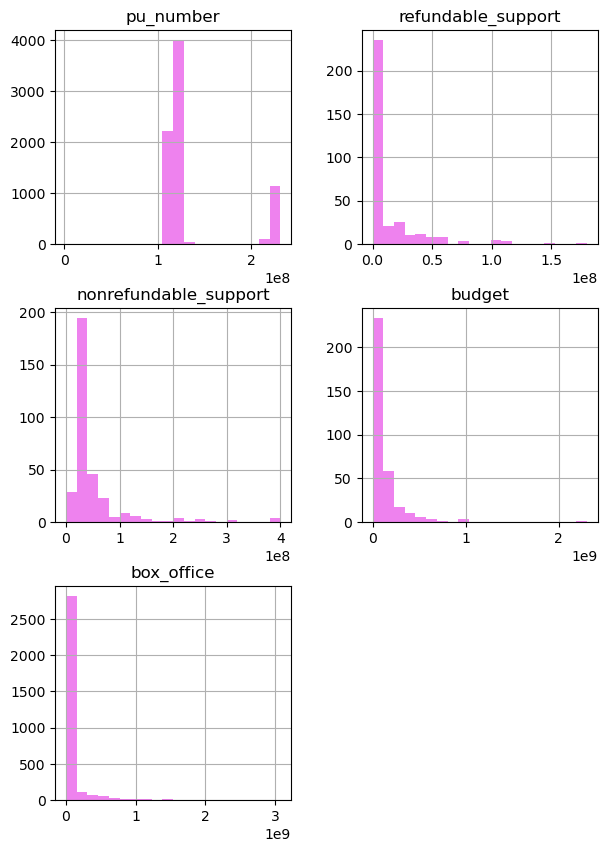

In [17]:
#Построение первых гистограмм
data.hist(bins=20, figsize=(7,10), color='violet')
plt.show()

#### Выводы после первого знакомства с данными:
1. В 11 столбцах из 15 есть пропущенные значения;
2. Минимум 2 столбца нуждаются в изменении типа данных;
3. На всех гистограммах присутствуют выбросы (исключаем первую гистограмму, так как нет смысла визуализировать номер прокатного удостоверения). 

## 2 Предобработка данных

### Работа с пропущенными значениями

#### Общее количество пропущенных значений

Визуализируем информацию о наличии и количестве пропущенных значений в каждом столбце:

In [18]:
#Визуализация процентного отношения пропущенных значений в виде гистограммы

def pass_values(data):
    try:
        pass_values = (data.isna().mean()*100).sort_values(ascending=True)
        plt.figure(figsize=(17,6))
        plt.barh(pass_values.index, pass_values, color='#00B7C2')
        plt.title('Пропущенные значения, %', fontsize=15, color='darkviolet')
        plt.xlabel('Процент пропусков', fontsize=15, color='darkviolet')
        plt.ylabel('Столбцы таблицы', fontsize=15, color='darkviolet')
        plt.xlim(0, 100)
        for i, v in enumerate(pass_values):
            plt.text(v, i, f'{v:.2f}%', color='black', va='center')
    except:
        print('пропусков не осталось, или произошла ошибка в первой части функции')

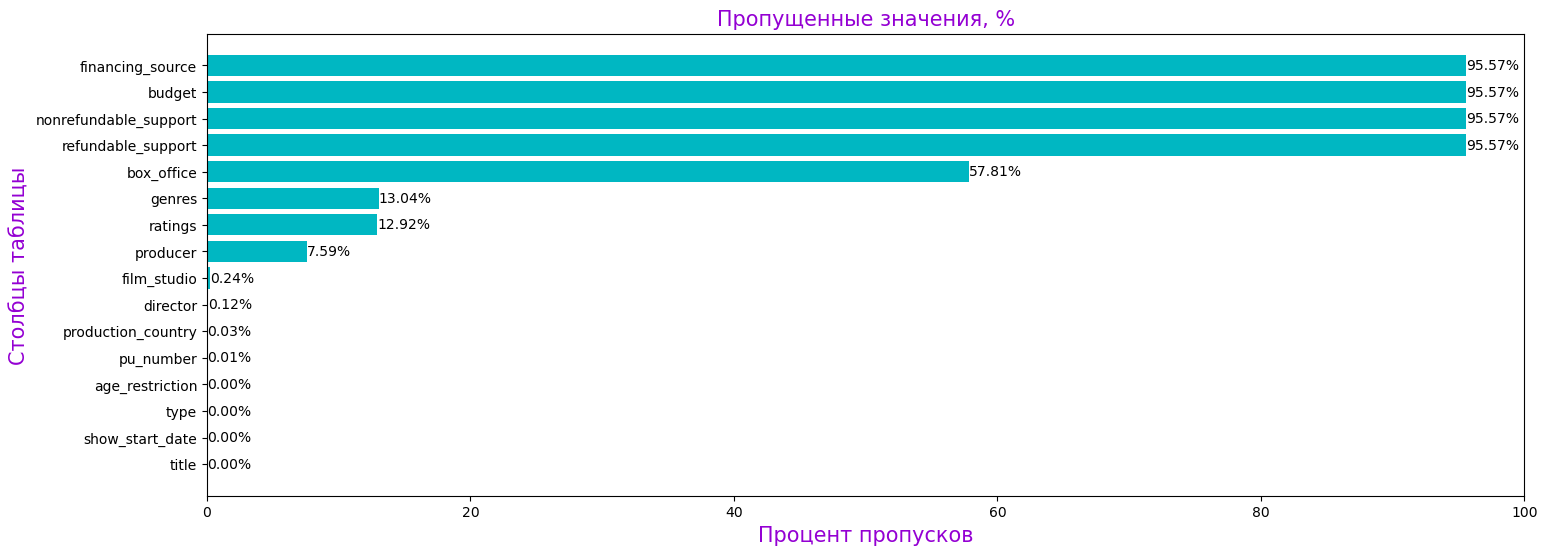

In [19]:
pass_values(data)

#### Столбцы `puNumber`, `production_country`, `director`, `film_studio`

Пропуски в столбцах `puNumber`, `production_country`, `director`, `film_studio` составляют менее 0.5% от всей таблицы, поэтому их можно удалить без искажения результатов исследования:

In [20]:
data = data.dropna(subset=['pu_number']).reset_index(drop=True)

In [21]:
data = data.dropna(subset=['production_country']).reset_index(drop=True)

In [22]:
data = data.dropna(subset=['director']).reset_index(drop=True)

In [23]:
data = data.dropna(subset=['film_studio']).reset_index(drop=True)

In [24]:
#check
data.shape[0]

7458

#### Причины пропусков в столбцах `financing_source`, `budget`, `refundable_support` и `nonrefundable_support`, `box_office`, `genres`, `ratings`, `producer`

Предположим возможные причины пропусков в оставшихся столбцах. Отметим, что ко всем столбцам можно отнести техническую причину пропуска - сбой при выгрузке информация с сайта. 

`financing_source`:
* пропущенное значение может быть связано с отсутствием источника государственного финансирования;

`budget`:
* так как данные в столбце указаны только для тех фильмов, которые получили государственную поддержку, пропущенное значение может означать отсутствие источника государственного финансирования;

`refundable_support` и `nonrefundable_support`:
* пропущенное значение может быть связано с отсутствием источника государственного финансирования, а следовательно, и объема невозвратных средств государственной поддержки;

`box_office`:
* фильм не вышел в прокат;
* фильм выпущен ограниченным тиражом, что влияет на размер кассовых сборов и их отражение в общедоступных источниках;

`genres`:
* фильм сложен для классификации, имеет "экспериментальный окрас";

`ratings`:
* количество оценок недостаточное для формирования рейтинга;

`producer`:
* желание продюссера остаться анонимным из определенных соображений.

#### Столбец  `financing_source`

Для возможности категоризации в дальнейшем заменим пропущенные значения столбца `financing_source` значением 'отсутствует':

In [25]:
data['financing_source'] = data['financing_source'].fillna('отсутствует')

#### Столбцы  `genres`, `ratings`, `producer`

➡️ Для возможности категоризации в дальнейшем заменим пропущенные значения столбца `genres` значением 'неизвестны':

In [26]:
data['genres'] = data['genres'].fillna('неизвестны')

➡️ Хоть на текущий этап предобработки тип данных `ratings` в столбце строковый, в дальнейшем он будет меняться на `float` в связи с содержанием столбца. Для возможности дальнейшего исследования, заполним пропущенные значения значением '0':

In [27]:
data['ratings'] = data['ratings'].fillna('0.0')

➡️ Для возможности дальнейшего исследования заменим пропущенные значения столбца `producer` значением 'неизвестен':

In [28]:
data['producer'] = data['producer'].fillna('неизвестны')

#### Столбец `budget`

Заметим, что столбец `budget` заполняется только для фильмов, имеющих гос. поддержку. Значит, если в столбце стоит пропущенное значение, - фильм не имеет государственную поддержку. 

Обратим внимание, что в столбце также можно встретить значения, равные 0. При этом соседние столбцы 
`refundable_support` и `nonrefundable_support` про объем возвратных и невозвратных средств гос.поддержки для таких строк имеют данные. В таком случае для подобных строк нужно заполнить `budget`. Эта особенность будет обработана в пункте 2.5

Пропущенные значения в `budget` удалять не будем. Вместо этого создадим еще один столбец `is_gov_support`, отвечающий на вопрос о государственной поддержки фильма:
* 0 - фильм не имеет государственную поддержку
* 1 - у фильма есть государственная поддержка

In [29]:
#категоризация фильмов по наличию гос.поддержки
def support(x):
    if x >= 0:
        return 1
    else:
        return 0

In [30]:
data['is_gov_support'] = data['budget'].apply(support)

#### Столбцы `box_office`, `refundable_support`, `nonrefundable_support`

Так как пропущенных значений в столбце `box_office` более половины, а в столбцах `refundable_support`, `nonrefundable_support` более 80% - оставих их без изменений.

### Изменение типа данных

#### Столбец `show_start_date`

Преобразуем данные столбца `show_start_date`, который заключает в себе даты премьер, в формат `DateTime`:

In [31]:
data['show_start_date'] = pd.to_datetime(data['show_start_date']).dt.date

In [32]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'])

#### Столбец `puNumber`

Преобразуем данные столбца `puNumber`, который заключает в себе номер прокатного удостоверения в формат `int`:

In [33]:
data['pu_number'] = data['pu_number'].astype(int)

#### Столбец `ratings`:

Преобразуем данные столбца `ratings`, который заключает в себе рейтинг кинофильма по информации с сайта КиноПоиск. Обратим внимание, что все значения столбца определяются в строковом формате, а среди уникальных значений можно найти, как формат записи рейтинга в виде десятичной дроби, так и в процентном виде. 

У нас нет уверенности в том, что мы получим истинную оценку, переведя процент в десятичную дробь. Можно удалить эти строки, если их немного.

In [34]:
data[data['ratings'].str.contains('%')].shape[0]

29

Строки с процентным значением рейтинга составляют менее 0.5% данных таблицы, значит, их можно удалить, не повредив результатам исследования:

In [35]:
#функция для удаления рейтинга в формате процентов

def delete_per(row):
    if '%' in row:
        return 'удалить'
    else:
        return row

In [36]:
data['ratings']= data['ratings'].apply(delete_per)

In [37]:
data = data.query('ratings != "удалить"')

In [38]:
#check
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', '0.0', '8.2', '7.5', '6.7', '7.9', '5.9', '6.2',
       '5.6', '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5',
       '5.1', '5.7', '5.4', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '3.7', '1.4', '3.1', '3.5',
       '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6',
       '1.0', '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '8.9', '9.1'],
      dtype=object)

In [39]:
#check
data.shape[0]

7429

In [40]:
data['ratings'] = data['ratings'].astype('float')

### Работа с дубликатами

#### Явные дубликаты

Проверим таблицу на наличие явных дубликатов:

In [41]:
data.duplicated().sum()

0

#### Неявные дубликаты по совпадениям в ключевых столбцах `puNumber`, `title`

Проверим таблицу на наличие неявных дубликатов по совпадениям в ключевых столбцах `puNumber`, `title`. 
Строки таблицы, у которых совпадают названия фильмов, но отличаются номера прокатных удостоверений, считать дубликатами нельзя, так как лица, получившие лицензию на прокат фильма, разные. Количество различных прокатных удостоверений для одного фильма может быть полезно в дальнейшем исследовании популярности фильма. 

In [42]:
data[data.duplicated(['pu_number', 'title'])].shape[0]

0

Неявных дубликатов нет.

#### Неявные дубликаты по совпадениям в столбцe `puNumber`

Были проанализированы в начале исследования при объединении двух датафрэймов. 

#### Неявные дубликаты по названию фильма

Обратим внимание, что датафрэйм содержит строки с одинаковым названием фильмов, но разными прокатными удостоверениями. Это значит, что фильм был в прокате в разных местах. Такие строки можно считать неполными дубликатами. 

Среди таких неполных дубликатов содержатся строки с совпадающим значением названия фильма и пропущенными значениями в значимых для дальнейшего исследования колонках `budget`, `box_office`. Такие дубликаты можно удалить, ведь ценности для дальнейшего исследования они не несут и могут только исказить его. 

Исследуем дубликаты в столбце `title`, предварительно выполнив срез по пустым значениям столбце `budget` и `box_office`. Зафиксируем, что на данный момент срез содержит 4275 строк, то есть ≈58% данных всей таблицы. 

In [43]:
data.query('budget.isnull() and box_office.isnull()').shape[0]

4275

Исследуем количество фильмов с дубликатами для такого среза. Заметим что у нас получилось 432 строки, в каждой из которых фильм имеет от 2 до 5 дубликатов. Это от 866 до 2160 строк. 

In [44]:
data.query('budget.isnull() and box_office.isnull()')['title'].value_counts().sort_values(ascending=False)[:409]

title
День святого Валентина_                   5
Кошки против собак: Месть Китти Галор     4
Дом грёз                                  4
Безумцы                                   4
Знакомство с Факерами 2.                  4
                                         ..
Фокус                                     2
Медведи-соседи.                           2
Разумное сомнение                         2
Вспомнить все /По произведению Ф.Дика/    2
Деловые люди                              1
Name: count, Length: 409, dtype: int64

Отсортируем датафрэйм по пропущенным значениям столбцов `budget` и `box_office` и удалим дубликаты, оставив только первое вхождение:

In [45]:
data = data.sort_values(['budget', 'box_office'], ascending=False).drop_duplicates(subset=['title', 'budget', 'box_office'], keep='first')

In [46]:
#check
data.shape[0]

6923

In [47]:
#check
data.query('budget.isnull() and box_office.isnull()')['title'].value_counts().sort_values(ascending=False)[:6]

title
Открытый простор     1
Председатель         1
Мисс Поттер          1
Перелом              1
Особо опасен         1
Остановился поезд    1
Name: count, dtype: int64

In [48]:
#check
data.query('title == "День святого Валентина_" or title == "Дом грёз"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,is_gov_support
385,Дом грёз,221005815,2015-02-25,Художественный,"Клиффджек Моушн Пикчерз, Морган Крик Продакшнз",США,Джим Шеридан,"Дэниэл Бобкер, Эхерн Крюгер, Джеймс Г.Робинсон...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,отсутствует,7.60,"драма,криминал",NaN,0
3896,День святого Валентина_,221083810,2010-07-15,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,отсутствует,6.70,"мелодрама,комедия",NaN,0


Размер отфильтрованного датафрэйма уменьшился на 506 строк, что составляет ≈7% данных исходной таблицы. Дубликаты были удалены. 

### Исследование категориальных значений

#### Столбец `type`

При исследовании уникальных значений столбца `type` заметим, что у нескольких типов в начале строки обнаружен пробел. Удалим его: 

In [49]:
data['type'].unique()

array([' Художественный', 'Художественный', 'Анимационный',
       ' Анимационный', 'Документальный', 'Прочие', 'Научно-популярный',
       'Музыкально-развлекательный'], dtype=object)

In [50]:
#удаляем все пробелы в значениях столбца
data['type'] = data['type'].str.strip()

In [51]:
#check
data['type'].unique()

array(['Художественный', 'Анимационный', 'Документальный', 'Прочие',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

#### Столбец `title`

При выводе уникальных значений столбца `title` заметим, что у некоторых названий фильмов в конце есть "_", ".". Удалим их:

In [52]:
data['title'].unique()

array(['Тайна Печати Дракона', 'Матильда', 'Союз спасения', ...,
       'Щенячий патруль: Скорей спешим на помощь!',
       'Машины песенки. Серия "Испанские мотивы"',
       'Машины песенки. Серия "Когда цветут кактусы"'], dtype=object)

In [53]:
data['title'] = data['title'].str.strip('_')
data['title'] = data['title'].str.strip('.')

#### Столбец `director`

При выводе уникальных значений столбца `title` заметим, что у некоторых имен режиссеров отсутствует полное имя. Так как в значениях данной строки может быть не одно, а несколько имен, произвести обработку таких значений качественно не получится. 

Однако мы можем выделить отдельный столбец `main_genre`, определив первого продюсера как "главного" и обработать такой столбец. Сделаем это позже при создании данного столбца.

In [54]:
data['director'].unique()

array(['О.Степченко', 'А.Учитель', 'А.Кравчук', ..., 'Ник Пауэлл',
       'А.Беляев', 'И.Трусов'], dtype=object)

#### Столбец `producer`

При выводе уникальных значений столбца `genres` заметим, что у некоторых имен режиссеров отсутствует полное имя. При этом в значениях данной строки может быть не одно, а несколько имен, поэтому произвести обработку таких значений качественно не получится. 

In [55]:
data['producer'].unique()

array(['С.Сельянов, А.Петрухин', 'А.Учитель, А.Достман, В.Винокур',
       'А.Максимов, К.Эрнст', ..., 'ВГИК',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

#### Столбец `genres`

При выводе уникальных значений столбца `genres` в качестве особенности можно отметить комбинацию из нескольких жанров. Выделим в дальнейшем отдельный столбец `main_genre`, определив первый жанр как главный и еще раз вернем к вопросу исследования и обработки значений. 

In [56]:
data['genres'].unique()

array(['приключения,фэнтези', 'фэнтези,комедия,семейный',
       'история,биография,драма', 'фантастика,боевик',
       'драма,биография,история', 'драма', 'драма,триллер,приключения',
       'спорт,драма', 'драма,военный,боевик',
       'приключения,триллер,биография', 'история,боевик,фэнтези',
       'детектив,фэнтези,триллер', 'история,драма',
       'драма,приключения,триллер', 'детектив,триллер,криминал',
       'драма,военный,история', 'мультфильм,комедия,приключения',
       'драма,спорт', 'мультфильм,фэнтези,комедия',
       'биография,спорт,драма', 'фэнтези', 'комедия,фэнтези,приключения',
       'мультфильм,приключения,детский', 'мультфильм,семейный,комедия',
       'фантастика,фэнтези,боевик', 'криминал,комедия,боевик',
       'мультфильм,детский', 'военный,драма',
       'фантастика,приключения,военный', 'военный,драма,история',
       'мультфильм,детский,приключения', 'драма,криминал',
       'драма,боевик,история', 'мультфильм,фэнтези,приключения',
       'фэнтези,боевик,

#### Столбец `film_studio`

При выводе уникальных значений столбца `film_studio` в качестве особенности можно отметить комбинацию из нескольких студий, что не дает возможность качественно обработать данный столбец.

In [57]:
data['film_studio'].unique()[0:10]

array(['ООО "Кинокомпания "СТВ"; ООО "РФГ Корп"; ООО "РФГ"; АО "Маринс Групп Интертеймент"; ООО "Фетисов Иллюзион"; ИП Петрухин; Чайна Филм Ко., Лтд.; Чайна Интернэшнл Филм & Медиа Корп., Лтд., Спаркл Ролл Медиа Корпорейшн, Лтд.',
       'ООО "ТПО "РОК", ООО "Матильда"', 'ЗАО "Дирекция кино"',
       'ООО "Арт Пикчерс Студия", ООО "Водород 2011"',
       'НО Фонд Андрея Кончаловского по поддержке кино и сценических искусств, ООО "Жан Виго Италия" (Jean Vigo Italia S.R.L.)',
       'ООО "Нон-Стоп Продакшн"', 'ООО "Студия "ТРИТЭ" Никиты Михалкова"',
       'ООО "Кинокомпания МАРС-фильм" по заказу ООО "ММЕ", ООО "Амедиа Продакшн" и АО "Телекомпания"',
       'ООО "ТаББаК", ООО "Студия Третий Рим"',
       'ООО "Продюсерский центр ИВАН"'], dtype=object)

#### Столбец `production_country`

При выводе уникальных значений столбца `production_country` в качестве особенности можно отметить комбинацию из нескольких стран, что не дает возможность качественно обработать данный столбец. Причем некоторые страны записаны через "-", а некоторве через пробел.

In [58]:
data['production_country'].unique()[0:10]

array(['Россия-Китай', 'Россия', 'Россия, Италия', 'Россия, Германия',
       'Россия, Сербия', 'Россия, Германия, Великобритания',
       'Россия-Украина', 'Россия, Армения', 'Россия-Словакия-Чехия',
       'Россия, Германия, Казахстан, Польша, Китай'], dtype=object)

📌 Основная проблема, замеченная в колонках с категориальным типом данных - наличие нескольких значений внутри каждой колонки в произвольном порядке. Дополнительно можно отметить, что имена режиссеров и продюссеров имеют два формата записи - полный и сокращенный. А страны производства фильма могут быть записаны через запятую, а могут - через пробел.

### Исследование количественных значений

#### Cтолбец `budget`

При исследовании количественных значений в столбцах `refundable_support`, `nonrefundable_support` и `budget` были обнаружены аномалии, связанные с тем, что бюджет равен 0 при том, что объем возвратных и невозвратных средств государственной поддержки ≠ 0. Мы знаем, что данные в столбце `budget` указаны только для тех фильмов, которые получили государственную поддержку, а согласно законодательству РФ объем государственной поддержки не может превышать 70% бюджета фильма, то есть заполнить значения столбца `budget` суммой значений столбцов `refundable_support`, `nonrefundable_support` будет некорректно. 

Для строк с ненулевыми значениями `refundable_support` и `nonrefundable_support` заполним столбец `budget`, двумя способами:
1. Информацией с сайта Кинопоиск;
2. В противном случае считая, что сумма объемов средств возвратной и невозвратной поддержки - это 70% от общего бюджета на фильм: 

In [59]:
data.query('budget == 0 and nonrefundable_support != 0 and refundable_support != 0') \
[['title','budget','refundable_support','nonrefundable_support']]

,title,budget,refundable_support,nonrefundable_support
5661,Селфи,0.00,20000000.00,40000000.00
2468,Воин (2015),0.00,10000000.00,70000000.00
2611,Савва. Сердце воина,0.00,60000000.00,100000000.00
6795,Большое путешествие,0.00,60000000.00,120000000.00
5794,Два хвоста,0.00,10000000.00,60000000.00
5996,Принцесса и дракон,0.00,40000000.00,40000000.00
3043,Любовь с ограничениями,0.00,19000000.00,51000000.00
3670,Чудо-юдо,0.00,20000000.00,20000000.00
3734,Мифы,0.00,25000000.00,20000000.00


In [60]:
data.loc[data['title'] == 'Воин (2015)', 'budget'] = 115000000

In [61]:
data.loc[data['title'] == 'Савва. Сердце воина', 'budget'] = 1000000000

In [62]:
data.loc[data['title'] == 'Мифы', 'budget'] = 50000000

In [63]:
data.loc[data['title'] == 'Селфи', 'budget'] = 115000000

In [64]:
data.loc[data['title'] == 'Два хвоста', 'budget'] = 115000000

In [65]:
data.loc[(data['budget'] == 0) & (data['refundable_support'] != 0) & (data['nonrefundable_support'] !=0), 'budget'] \
= (data['refundable_support'] + data['nonrefundable_support']) / 0.7

Для строк с ненулевым значением в столбце `refundable_support` при нулевых значениях в остальных столбцах, воспользуемся сервисом КиноПоиск, чтобы достать информацию об общем бюджете фильма:

In [66]:
data.query('budget == 0 and refundable_support != 0') \
[['title', 'budget','refundable_support','nonrefundable_support']]

,title,budget,refundable_support,nonrefundable_support
2528,Бармен,0.00,20000000.00,0.00


In [67]:
data.loc[data['title'] == 'Бармен', 'budget'] = 60000000

Для строк с ненулевым значением в столбце `nonrefundable_support` при нулевых значениях в остальных столбцах, воспользуемся сервисом КиноПоиск, чтобы достать информацию об общем бюджете фильма:

In [68]:
data.query('budget == 0 and nonrefundable_support != 0') \
[['title','budget','refundable_support','nonrefundable_support']]

,title,budget,refundable_support,nonrefundable_support
3560,Притяжение (2016),0.00,0.00,250000000.00
2054,Дуxless 2,0.00,0.00,75000000.00
2784,Срочно выйду замуж,0.00,0.00,35000000.00
2870,Помню - не помню!,0.00,0.00,6000000.00
2049,14+,0.00,0.00,23000000.00
2680,Тряпичный союз,0.00,0.00,59000000.00
6309,Баба Яга,0.00,0.00,138969465.00


In [69]:
data.loc[data['title'] == 'Духless 2', 'budget'] = 140000000

In [70]:
data.loc[data['title'] == 'Притяжение (2016)', 'budget'] = 380000000

In [71]:
data.loc[data['title'] == 'Баба Яга', 'budget'] = 220000000

Общий бюджет одного из фильмов указан в долларах, поэтому воспользуемся информацией о среднегодовом курсе доллара в 2015 году для перевода значения в рубли:

In [72]:
data.loc[data['title'] == 'Срочно выйду замуж', 'budget'] = 85400000

Для оставшихся фильмов КиноПоиск не содержит информации о бюджете. Данные строки составляют ≈0.05% от всей таблицы, поэтому удалим их без искажения результатов дальнейшего исследования:

In [73]:
data = data.query('budget != 0')

In [74]:
#check
data.shape[0]

6919

#### Столбец `box_office`

Исследуем столбец на наличие аномальных значений. Мы знаем, что столбец содержит много пропущенных значений. А содержит ли он значения, равные "0"? Если да, то как выглядят значения в других колонках? Например, в не менее важном столбце для исследования `budget`:

In [75]:
data.query('box_office == 0')['budget']

66     NaN
237    NaN
596    NaN
913    NaN
931    NaN
932    NaN
975    NaN
1125   NaN
1385   NaN
1557   NaN
1769   NaN
1779   NaN
1974   NaN
2033   NaN
2074   NaN
2215   NaN
2438   NaN
2681   NaN
3590   NaN
3822   NaN
3988   NaN
4059   NaN
4780   NaN
Name: budget, dtype: float64

Отмечаем, что значение бюджета для фильмов с кассовыми сборами, равными 0, пропущено. Это значит, что данные фильмы не имели государственной поддержки. Отметим, что таких значений всего 23, а значит их можно удалить, не исказив результаты дальнейшего исследования:

In [76]:
data = data.query('box_office !=0')

In [77]:
#check
data.shape[0]

6896

Исследуем обновленный датафрэйм на минимальную сумму кассовых сборов:

In [78]:
data['box_office'].sort_values(ascending=True)

151     40.00
2270    50.00
3911    75.00
1179    80.00
4056   100.00
        ...  
7453      NaN
7454      NaN
7455      NaN
7456      NaN
7457      NaN
Name: box_office, Length: 6896, dtype: float64

Обнаруживаем значения, вызывающие вопросы. Сумма касовых сборов равна 40 рублям? Посмотрим, сколько строк имеют сумму кассовых сборов менее 10 тысяч рублей:

In [79]:
data.query('box_office < 10000').shape[0]

513

Таких строк 513 - ≈10% данных всей таблицы. 

Обратим внимание на годы этих фильмов. Добавим для этого в таблицу столбец `show_year` с инофрмацией о годе проката фильма:

In [80]:
data['show_year'] = data['show_start_date'].dt.year

In [81]:
data.query('box_office < 10000')['show_year'].unique()

array([2015, 2016, 2012, 2011, 2013, 2014, 2010, 2017, 2019], dtype=int32)

Фильмы с низкой суммой кассовых сборов есть во все годы. Будем считать аномальной величиной сумму кассовых сборов менее 1000 рублей. Удалим такие строки из датафрейма:

In [82]:
data = data.query('box_office > 1000 or box_office.isnull()')

In [83]:
#check
data.shape[0]

6685

### Добавление новых столбцов 





#### Столбцы `main_genre`, `main_director`

Добавим в таблицу столбец `main_genre` с информацией об основном жанре фильма. Благодаря ним мы сможем исследовать популярность жанра и конкретных режиссеров. Будем считать основным жанром первый жанр из столбца `genres` каждой строки. Также добавим в таблицу столбец `main_director` с именем и фамилией главного режиссера фильма. Будем считать главным режиссером первые ФИ из столбца `director` каждой строки: 

In [84]:
#функция для выделения главного жанра и главного режиссера:
def main(x):
    separation = x.split(',')
    return separation[0]

In [85]:
data['main_genre'] = data['genres'].apply(lambda x: main(x) if pd.notnull(x) else None)

In [86]:
data['main_director'] = data['director'].apply(lambda x: main(x) if pd.notnull(x) else None)

Исследуем уникальные значения столбца `main_genre`. Никаких особенностей в данных не выявлено:

In [87]:
data['main_genre'].unique()

array(['приключения', 'фэнтези', 'история', 'фантастика', 'драма',
       'спорт', 'детектив', 'мультфильм', 'биография', 'комедия',
       'криминал', 'военный', 'триллер', 'мюзикл', 'семейный', 'боевик',
       'неизвестны', 'мелодрама', 'ужасы', 'реальное ТВ', 'детский',
       'аниме', 'вестерн', 'документальный', 'музыка', 'для взрослых',
       'концерт', 'короткометражка', 'фильм-нуар'], dtype=object)

Исследуем уникальные значения столбца `main_director`. Подтверждаем особенность, выделенную в пунтке 2.4.3, связанную с различным написанием имени. В данном столбце мы можем привести данные к единому виду, сократив все имена до первой буквы и добавим "." в качестве разделителя.

In [88]:
data['main_director'].unique()

array(['О.Степченко', 'А.Учитель', 'А.Кравчук', ..., 'Ник Пауэлл',
       'А.Беляев', 'И.Трусов'], dtype=object)

In [89]:
#функция для сокращения имени режиссера

def short_name(row):
    if '.' in row:
        return row
    else:
        name_list = row.split(' ')
        if len(name_list) > 1:
            name = name_list[0]
            surname = name_list[1]
            short_name = name[0] if len(name) > 0 else ''
            result = short_name + '.' + surname
            return result
        else:
            return row

In [90]:
data['main_director'] = data['main_director'].apply(short_name)

####  Столбец `share_support`

Добавим в таблицу столбец `share_support` с информацией о том, какую долю от общего бюджета составляет государственная поддержка. Благодаря нему мы сможем исследовать, как изменялась сумма гос.поддержки с течением лет, а также понимать, насколько большую часть она составляет для каждого фильма.

In [91]:
data['share_support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

#### Столбец `country_type`

Добавим в таблицу столбец `country_type` с информацией о том, отчественного ли производства данный фильм или иностранного. Благодаря нему мы сможем исследовать, популярность отечественных и иностранных фильмов. Для категоризации будем использовать столбец `production_country`:

In [92]:
#функция для категоризации страны производства
def country(x):
    if x == 'Россия' or x == 'СССР':
        return 'отечественный'
    elif 'Россия' in x or 'СССР' in x:
        return 'совместный'
    else:
        return 'иностранный'

In [93]:
data['country_type'] = data['production_country'].apply(country)

### Вывод по окончании предобработки данных

1. Обработаны пропущенные значения во всех столбцах: часть строк, с пропущенными значениями, были удалены, в части строк пропущенные значения были заменены, пропущенные значения в столбцах `budget`, `box_office`, `refundable_support`, `nonrefundable_support` были оставлены без изменений.
1. Таблица была проверена на наличие явных дубликатов, дубликатов по ключевым значениям. 
1. Обработаны категориальные значения столбцов `type`, `title`. 
2. Обработаны количественные значения `budget`: выяснена разница между значением "0" и "nan", категоризированы строки в соответствии со значением в столбце, заполнены строки со значением 0.
3. Для дальнейшего исследования были созданы столбцы `is_gos_support`,`country_type`, `share_support`, `main_director`, `main_genre`, `show_year`. Все они помогут отвечать на вопросы, поставленные в начале исследования. 

## Исследовательский анализ данных


### Исследование количества фильмов, выходивших в прокат каждый год

Обратим внимание, что столбец `box_office` имеет около 60% пропущенных значений. 

Посчитаем, какая доля фильмов в каждом году не имеет информации о прокате. Добавим столбец `is_box_office`, который будет принимать два значения:
* 0, если значение в столбце `box_office` пропущенно
* 1, если значение в столбце `box_office` есть

In [94]:
#функция для категоризации по наличию информации о прокате
def yes_box(x):
    if pd.isnull(x):
        return 0
    else:
        return 1

In [95]:
data['is_box_office'] = data['box_office'].apply(yes_box)

Составим сводную таблицу, сгруппированную по столбцу `show_year` для столбцов `box_office`, `is_box_office`. В этой таблице будет отраженно, сколько фильмов с информацией о прокате мы имеем каждый год, а также какую часть от всех фильмов этого года они составляют:

In [96]:
#количество фильмов, выходивших в прокат каждый год и их доля среди всех фильмов этого года
data.pivot_table(index='show_year', values=['box_office', 'is_box_office'], \
                 aggfunc={'box_office': 'count', 'is_box_office': 'mean'}).style.background_gradient('Blues')

,box_office,is_box_office
show_year,,
2010,61,0.081551
2011,79,0.170996
2012,90,0.181452
2013,132,0.241758
2014,222,0.318508
2015,451,0.663235
2016,511,0.650955
2017,356,0.713427
2018,473,0.546821


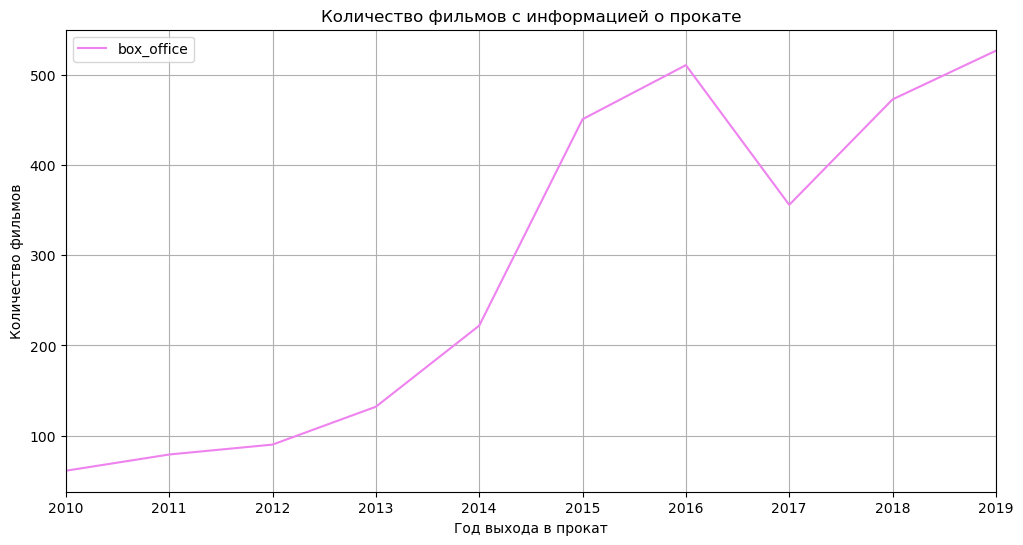

In [97]:
data.pivot_table(index='show_year', values='box_office', aggfunc='count') \
.plot(title='Количество фильмов с информацией о прокате', 
          alpha=1, 
          grid=True,   
          color='violet',                                                                    
          figsize=(12,6))
plt.xlim(2010, 2019)
plt.xlabel("Год выхода в прокат")
plt.ylabel("Количество фильмов")
plt.show()

📌 Вывод о полученных данных:
* Больше всего фильмов, имеющих информацию о прокате, были выпущены в 2016 и 2019 году;
* В период с 2010 по 2015 год росло как количество фильмов, вышедших в прокат, так и доля фильмов с известной информацией о прокате;
* В период с 2015 по 2019 год меньше всего фильмов вышло в прокат в 2017 году; 
* Наиболее полно в таблице представлена информация о прокате фильмов c 2015 по 2019 год, поэтому при дальнейшем исследовании на этот период будет направлен больший фокус.

### Исследование динаминки проката по годам

Составим сводную таблицу, сгруппированную по столбцу `show_year`, в которой посчитаем сумму кассовых сборов со всех фильмов, вышедших в прокат в данном году:

In [98]:
data.pivot_table(index='show_year', values='box_office', aggfunc='sum') \
.sort_values(by='box_office', ascending=False).style.background_gradient('Blues').format('{:,.0f}')

,box_office
show_year,
2018,"49,666,774,688"
2017,"48,563,669,258"
2019,"48,421,074,315"
2016,"47,847,363,128"
2015,"38,517,943,910"
2014,"7,434,688,918"
2013,"29,777,791"
2011,"14,089,360"
2012,"6,896,193"


* Максимальная сумма сборов отмечается в 2018 году, а минимальная - в 2010;
* По сравнению с 2010 годом, в 2019 сумма сборов выросла в почти 20000 раз.

Построим график, чтобы изучить динамику проката по годам:

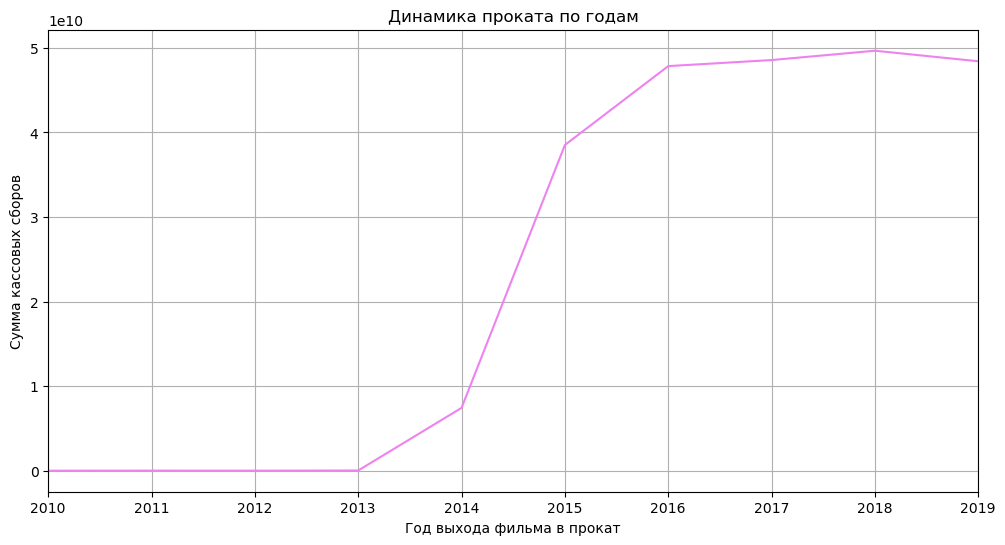

In [99]:
data.pivot_table(index='show_year', values='box_office', aggfunc='sum').plot(title='Динамика проката по годам', 
          alpha=1, 
          grid=True,
          figsize=(12,6),
          color='Violet') 
plt.xlim(2010,2019)
plt.xlabel('Год выхода фильма в прокат')
plt.ylabel('Сумма кассовых сборов')
plt.legend().set_visible(False)
plt.show()

Заметим сильный прирост в сумме кассовых сборов в 2015 году. Обратимся к ТОП-5 фильмов этого года с наибольшей суммой кассовых сборов:

In [100]:
data.query('show_year == 2015').sort_values(by='box_office', ascending=False).head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,is_gov_support,show_year,main_genre,main_director,share_support,country_type,is_box_office
3113,Звёздные войны: Пробуждение силы,121024915,2015-12-11,Художественный,"Лукасфилм, Бэд Робот, Трунорт Продакшнз",США,Джей Джей Абрамс,"Джей Джей Абрамс, Брайан Берк, Кэтлин Кеннеди",«12+» - для детей старше 12 лет,NaN,...,7.10,"фантастика,боевик,приключения",1658861425.50,0,2015,фантастика,Д.Джей,NaN,иностранный,1
2574,Миньоны,124001715,2015-03-30,Анимационный,Иллюминейшн Интертейнмент,США,"Кайл Балда, Пьер Соффин","Кристофер Меледандри, Джанет Хили",«6+» - для детей старше 6 лет,NaN,...,6.20,"мультфильм,фантастика,комедия",1646580645.70,0,2015,мультфильм,К.Балда,NaN,иностранный,1
2155,Мстители: Эра Альтрона,121007215,2015-04-03,Художественный,Марвел Студиос,США,Джосс Уидон,Кевин Фейги,«12+» - для детей старше 12 лет,NaN,...,7.20,"фантастика,боевик,приключения",1500989281.90,0,2015,фантастика,Д.Уидон,NaN,иностранный,1
2101,Форсаж 7,121001215,2015-01-27,Художественный,"Юниверсал Пикчерз, Релятивити Медиа, Дентсу, Ф...",США,Джеймс Ван,"Вин Дизель, Майкл Фоттрел",«16+» - для детей старше 16 лет,NaN,...,7.00,"боевик,триллер,приключения",1486131019.00,0,2015,боевик,Д.Ван,NaN,иностранный,1
2575,Мир Юрского периода,121006515,2015-04-03,Художественный,"Эмблин Интертейнмент, Леджендари Пикчерз, Юнив...",США,Колин Треворроу,"Патрик Краули, Фрэнк Маршалл",«12+» - для детей старше 12 лет,NaN,...,6.90,"фантастика,приключения,боевик",1211158990.00,0,2015,фантастика,К.Треворроу,NaN,иностранный,1


📌 Выводы о динамике проката по построенному графику:
* С 2010 по 2013 год динамика незначительная;
* C 2013 по 2016 год наблюдается сильный рост проката;
* C 2016 по 2018 год рост проката незначителен;
* В 2015 году отмечается сильный рост суммы кассовых сборов. Это может быть связано с выходами очередных частей таких серий фильмов, как "Звездные войны", "Мстители" и "Форсаж". Также с 1 июля 2015 года наличие прокатного удостоверения для показа фильма стало обязательным в связи с изменениями в Федеральном законе от 22 августа 1996 года N 126-ФЗ @О государственной поддержке кинематографии Российской Федерации";
* С 2018 года отмечается падение. 

### Исследование кассовых сборов

Составим сводную таблицу, сгруппированную по столбцу `show_year`, где для каждого года посчитаем среднюю и медианную сумму сборов:

In [101]:
data.pivot_table(index='show_year', values='box_office', aggfunc={'box_office':['mean','median']}) \
.style.background_gradient('Blues').format('{:,.0f}')

,mean,median
show_year,,
2010,"39,552","4,530"
2011,"178,346","5,695"
2012,"76,624","11,678"
2013,"225,589","7,127"
2014,"33,489,590","136,185"
2015,"85,405,641","5,265,220"
2016,"93,634,762","4,475,530"
2017,"136,414,801","10,177,834"
2018,"105,003,752","8,931,966"


Отметим, что в каждом году средняя величина сборов заметно отличается от медианной. Это означает, что среди фильмов есть выбросы - они значительно отличаются по сумме кассовых сборов. 

Построим график, чтобы изучить динамику суммы кассовых сборов:

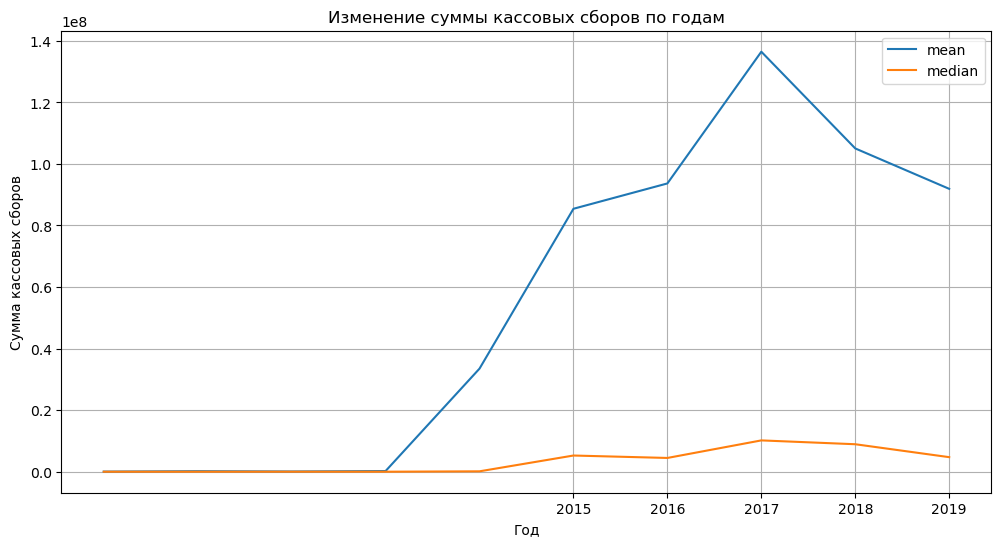

In [102]:
data.pivot_table(index='show_year', values='box_office', aggfunc={'box_office':['mean','median']}) \
.plot(title='Изменение суммы кассовых сборов по годам', 
          alpha=1, 
          grid=True, 
          figsize=(12,6))
plt.xlabel("Год")
plt.ylabel('Сумма кассовых сборов')
plt.xticks(range(2015,2020,1))
plt.show()

📌 Выводы по построенному графику:
* До 2017 года отмечается рост как медианной, так и средней суммы кассовых сборов;
* Наиболее удачным по средней сумме кассовых сборов отмечен 2017 год, несмотря на то, что именно в нем меньше всего фильмов вышло в прокат. 

### Исследование возрастных ограничений

Составим сводную таблицу по столбцу `age_restriction` для периода с 2015 года, где посмотрим на сумму кассовых сборов в зависимости от возрастного ограничения. Берем период именно с 2015 года, так как все годы до этого нам известно не более 35% данных о прокате фильмов:

In [103]:
data.query('show_year > 2014') \
.pivot_table(index='age_restriction', columns='show_year', values='box_office', aggfunc='sum') \
.style.background_gradient('Blues').format('{:,.0f}')

show_year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,"379,054,358","150,033,832","229,598,930","32,449,002","17,746,067"
«12+» - для детей старше 12 лет,"13,616,082,009","12,189,083,593","7,851,389,701","14,267,250,436","12,680,198,774"
«16+» - для детей старше 16 лет,"10,921,155,839","16,664,465,402","18,745,042,900","16,503,602,347","12,748,819,512"
«18+» - запрещено для детей,"5,428,920,770","6,790,636,874","9,651,495,581","8,758,498,280","10,121,796,304"
«6+» - для детей старше 6 лет,"8,172,730,934","12,053,143,428","12,086,142,146","10,104,974,623","12,852,513,659"


В течение 4-х лет наибольшее количество кассовых сборов собирают фильмы категории "16+". В ТОПе-5 фильмов с наибольшими кассовыми сборами находятся 3 фильма киностудии "Марвел": "Мстители: Финал" (2017), "Веном" (2018) и "Мстители: война бесконечности" (2018). На втором месте находится фильм "Пираты Карибского моря: Мертвецы не рассказывают сказки" 2017 года. 

Отметим, что на 5 месте в данной категории находится российский фильм "Полицейский с рублевки. Новогодний беспредел" 2018 года, снятый по мотивам сериала с новогодней "приправой". 

In [104]:
data.query('age_restriction == "«16+» - для детей старше 16 лет"') \
.sort_values(by='box_office', ascending=False).head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,is_gov_support,show_year,main_genre,main_director,share_support,country_type,is_box_office
6792,Мстители: Финал,121005519,2019-04-29,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,...,7.60,"фантастика,боевик,драма",2576613776.83,0,2019,фантастика,Д.Руссо,NaN,иностранный,1
3483,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,...,6.60,"фэнтези,боевик,комедия",2118396119.00,0,2017,фэнтези,Й.Реннинг,NaN,иностранный,1
6260,Веном,121022018,2018-10-04,Художественный,"Коламбиа Пикчерз, Марвел Интертейнмент, Паскал...",США,Рубен Флейшер,"Ави Арад, Эми Паскаль, Мэтт Толмак",«16+» - для детей старше 16 лет,NaN,...,6.80,"боевик,фантастика,триллер",1913257923.06,0,2018,боевик,Р.Флейшер,NaN,иностранный,1
5852,Мстители: Война бесконечности,121009118,2018-05-03,Художественный,Марвел Студиос,США,"Энтони Руссо, Джо Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,...,7.90,"фантастика,боевик,приключения",1875989712.42,0,2018,фантастика,Э.Руссо,NaN,иностранный,1
6453,Полицейский с рублевки. Новогодний беспредел,111023318,2018-12-20,Художественный,"ООО ""ЛЕГИО ФЕЛИКС"", ООО ""Ника ТВ""",Россия,И.Куликов,"И.Куликов, А.Семенов, ООО ""Ника ТВ""",«16+» - для детей старше 16 лет,NaN,...,5.80,"комедия,приключения",1682680039.03,0,2018,комедия,И.Куликов,NaN,отечественный,1


В 2019 году отмечена высокая популярность фильмов с ограничением "6+". Сделаем срез по данным параметрам и посмотрим на ТОП-5 фильмов. В рассматриваемом году вышло продолжение американских мультиков "Холодное сердце 2", "Как приручить дракона 3", "Тайная жизнь домашних животных 2", а также вторая часть фильма "Малефисента: Владытчица Тьмы". 

In [105]:
data.query('show_year == 2019 and age_restriction == "«6+» - для детей старше 6 лет"') \
.sort_values(by='box_office', ascending=False).head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,is_gov_support,show_year,main_genre,main_director,share_support,country_type,is_box_office
7188,Малефисента: Владычица тьмы,121026219,2019-10-04,Художественный,"Рот Филмз, Уолт Дисней Пикчерз",США,Йоаким Роннинг,"Анджелина Джоли, Джо Рот, Дункан Хендерсон",«6+» - для детей старше 6 лет,NaN,...,6.90,"фэнтези,приключения,семейный",1911944865.95,0,2019,фэнтези,Й.Роннинг,NaN,иностранный,1
7355,Холодное сердце II,124009619,2019-11-23,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерс",США,"Крис Бак, Дженнифер Ли",Питер Дел Вечо,«6+» - для детей старше 6 лет,NaN,...,7.10,"мультфильм,мюзикл,фэнтези",1827244672.81,0,2019,мультфильм,К.Бак,NaN,иностранный,1
6688,Как приручить дракона 3,124000719,2019-02-21,Анимационный,"ДримУоркс Анимейшн, Мэд Хаттер Интертейнмент",США,Дин ДеБлуа,"Бонни Арнольд, Брэд Льюис",«6+» - для детей старше 6 лет,NaN,...,7.70,"мультфильм,фэнтези,боевик",1689540830.24,0,2019,мультфильм,Д.ДеБлуа,NaN,иностранный,1
6929,Тайная жизнь домашних животных 2,124003519,2019-05-25,Анимационный,"Иллюминейшн Интертейнмент, Юниверсал Пикчерз","США, Франция, Япония",Крис Рено,Лиз-Мари Амар,«6+» - для детей старше 6 лет,NaN,...,6.80,"мультфильм,комедия,приключения",1478921168.46,0,2019,мультфильм,К.Рено,NaN,иностранный,1
7245,Эверест,124008119,2019-10-03,Анимационный,"Дрим Воркс Анимэйшн, Перл Студио",США - КНР,"Тодд Вилдерман, Джилл Калтон",Сюзанн Бёрги,«6+» - для детей старше 6 лет,NaN,...,7.20,"боевик,триллер,драма",689483900.11,0,2019,боевик,Т.Вилдерман,NaN,иностранный,1


В 2015 году наибольшей популярностью в прокате пользовались американские фильмы категории "12+". Среди ТОП-5 мы вновь наблюдаем "Мстителей", а также "Звездные войны", "Мир юрского периода", "Терминатор" и "Эверест". 

In [106]:
data.query('show_year == 2015 and age_restriction == "«12+» - для детей старше 12 лет"') \
.sort_values(by='box_office', ascending=False).head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,is_gov_support,show_year,main_genre,main_director,share_support,country_type,is_box_office
3113,Звёздные войны: Пробуждение силы,121024915,2015-12-11,Художественный,"Лукасфилм, Бэд Робот, Трунорт Продакшнз",США,Джей Джей Абрамс,"Джей Джей Абрамс, Брайан Берк, Кэтлин Кеннеди",«12+» - для детей старше 12 лет,NaN,...,7.10,"фантастика,боевик,приключения",1658861425.50,0,2015,фантастика,Д.Джей,NaN,иностранный,1
2155,Мстители: Эра Альтрона,121007215,2015-04-03,Художественный,Марвел Студиос,США,Джосс Уидон,Кевин Фейги,«12+» - для детей старше 12 лет,NaN,...,7.20,"фантастика,боевик,приключения",1500989281.90,0,2015,фантастика,Д.Уидон,NaN,иностранный,1
2575,Мир Юрского периода,121006515,2015-04-03,Художественный,"Эмблин Интертейнмент, Леджендари Пикчерз, Юнив...",США,Колин Треворроу,"Патрик Краули, Фрэнк Маршалл",«12+» - для детей старше 12 лет,NaN,...,6.90,"фантастика,приключения,боевик",1211158990.00,0,2015,фантастика,К.Треворроу,NaN,иностранный,1
2505,Терминатор: Генезис,121012415,2015-06-11,Художественный,"Парамаунт Пикчерз, Скайдэнс Продакшнз",США,Алан Тэйлор,"Дэвид Эллисон, Дэна Голдберг",«12+» - для детей старше 12 лет,NaN,...,6.40,"фантастика,боевик,триллер",1060054283.00,0,2015,фантастика,А.Тэйлор,NaN,иностранный,1
2595,Эверест (2015),121012815,2015-06-23,Художественный,"Кросс Крик Пикчерз, Фри Стейт Пикчерз, Эр Вэ К...",США,Бальтазар Кормакур,"Ники Кентиш Барнс, Тим Беван, Лиза Чейсин",«12+» - для детей старше 12 лет,NaN,...,7.20,"боевик,триллер,драма",630550647.80,0,2015,боевик,Б.Кормакур,NaN,иностранный,1


Построим столбчатую диаграмму по кассовым сборам в период с 2015 по 2019 год для каждой возрастной категории: 

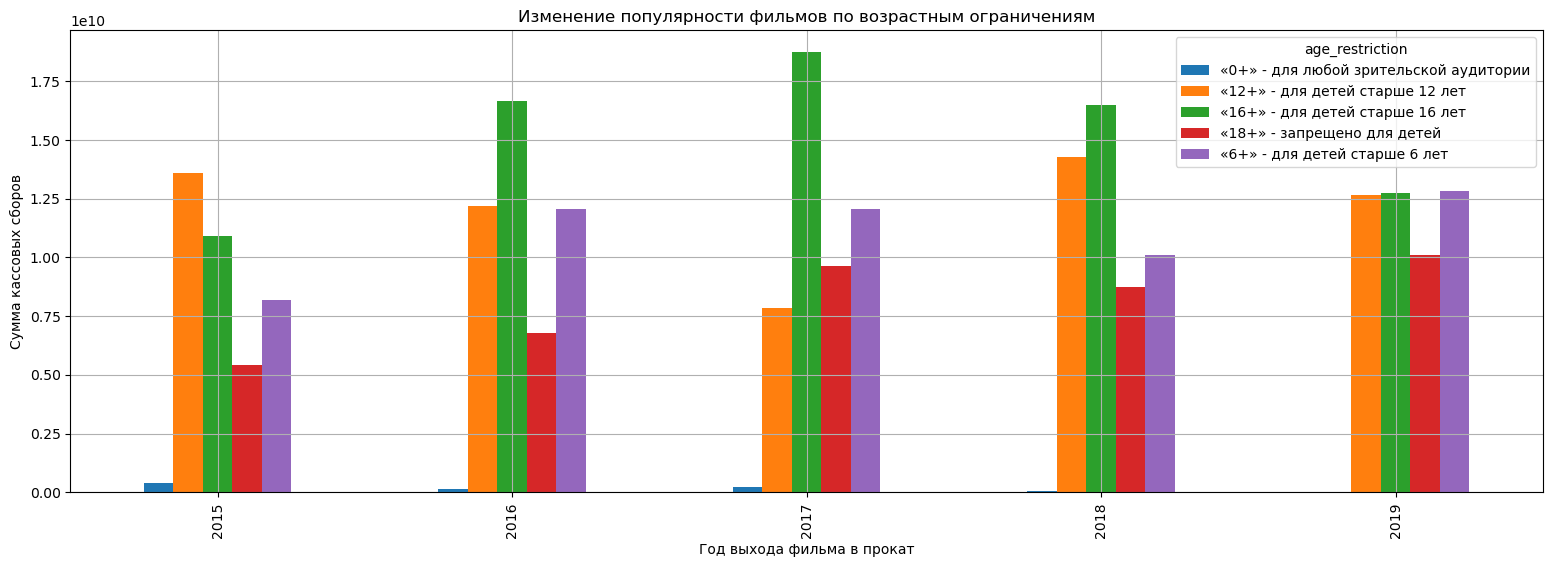

In [107]:
data.query('show_year >= 2015').pivot_table(index='show_year', columns='age_restriction', \
                                            values='box_office', aggfunc='sum') \
.plot(title='Изменение популярности фильмов по возрастным ограничениям', 
          alpha=1, 
          grid=True, 
          kind='bar',                                                                                                                       
          figsize=(19,6))
plt.xlabel('Год выхода фильма в прокат')
plt.ylabel('Сумма кассовых сборов')
plt.show()

📌 Выводы по построенной диаграмме:
* Наибольшее количество сборов 3 года из 5 собирали фильмы категории "16+";
* Фильмы категории "0+" собирают наименее количество кассовых сборов. 

Проанализируем средние продажи для каждой категории фильмов в период с 2015 по 2019 год:

In [108]:
data.query('show_year > 2014').pivot_table(index='age_restriction', columns='show_year', values='box_office') \
.style.background_gradient('Blues').format('{:,.0f}')

show_year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,"10,529,288","3,948,259","76,532,977","6,489,800","5,915,356"
«12+» - для детей старше 12 лет,"189,112,250","150,482,513","196,284,743","216,170,461","149,178,809"
«16+» - для детей старше 16 лет,"66,592,414","93,097,572","154,917,710","105,792,323","72,436,474"
«18+» - запрещено для детей,"41,760,929","45,882,682","65,656,433","49,205,047","55,310,362"
«6+» - для детей старше 6 лет,"166,790,427","185,432,976","268,580,937","148,602,568","160,656,421"


Построим столбчатую диаграмму по кассовым сборам в период с 2015 по 2019 год для каждой возрастной категории: 

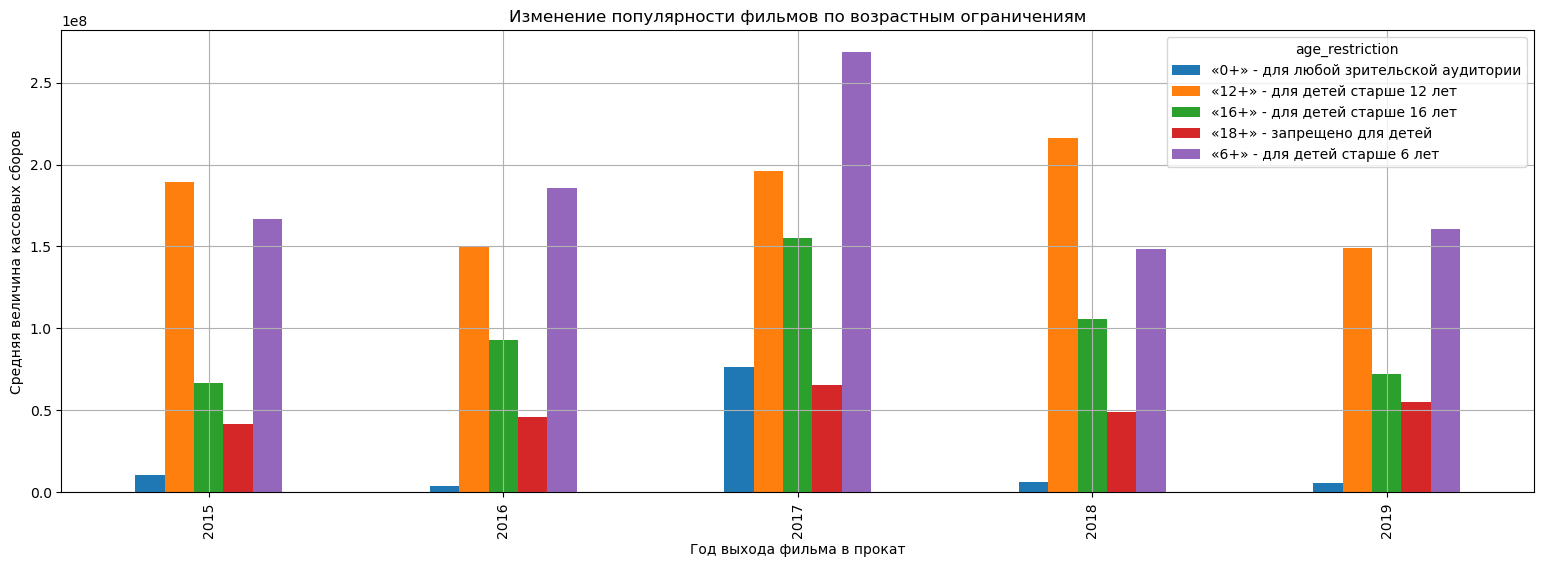

In [109]:
data.query('show_year >= 2015').pivot_table(index='show_year', columns='age_restriction', \
                                            values='box_office') \
    .plot(title='Изменение популярности фильмов по возрастным ограничениям', 
          alpha=1, 
          grid=True, 
          kind='bar',                                                                                                                       
          figsize=(19,6))
plt.xlabel('Год выхода фильма в прокат')
plt.ylabel('Cредняя величина кассовых сборов')
plt.show()

📌 Выводы по построенной диаграмме:
* По средней сумме кассовых сборов в течение 5 лет лидерами являются фильмы категории "12+" и "6+";
* В 2017 году отмечается кратный рост средних кассовых сборов для фильмов всех категорией, кроме "18+" - там он незначителен. 
* Можно предположить, что на предыдущей диаграмме фильмы категории "16+" приносят наибольшую сумму кассовых сборов в связи с прокатом более интересных зрителю фильмов. Однако для средней величины кассовых сборов эта категория популярной не является. 

### Исследуем фильмы по жанрам

Построим столбчату диаграмму, используя сводную таблицу по столбцу `main_genre`, чтобы проанализировать, сколько фильмов каждого жанра были выпущены в прокат в период с 2015 по 2019 годы:

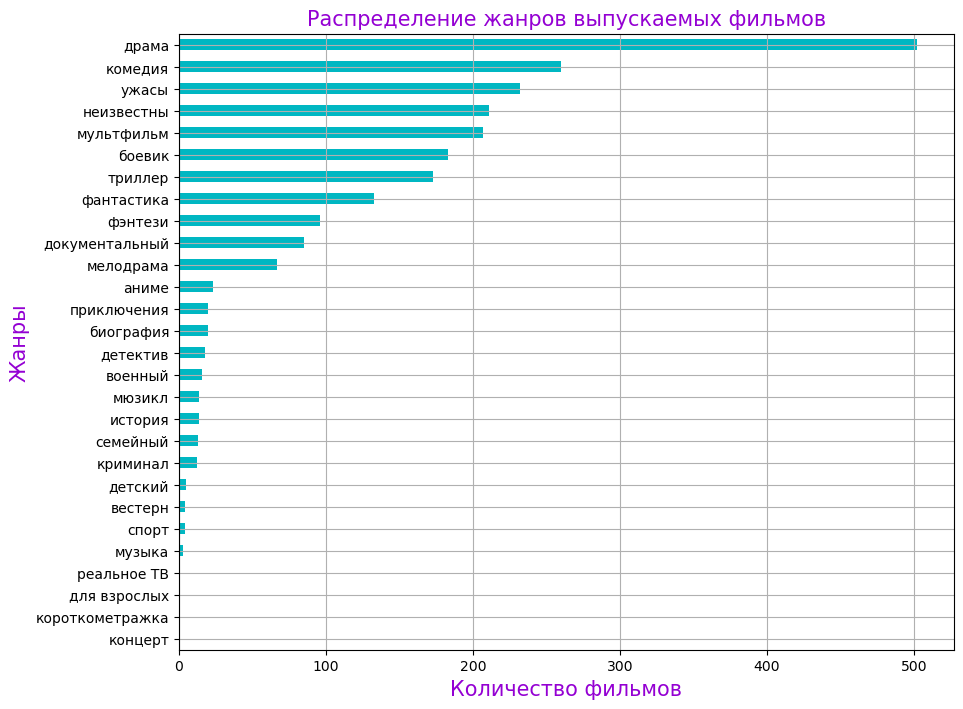

In [110]:
data.query('show_year > 2014').pivot_table(index='main_genre', values='box_office', aggfunc='count') \
.sort_values(by='box_office', ascending=True).plot(
          alpha=1, 
          kind='barh',
          color='#00B7C2',
          grid=True, 
          figsize=(10,8))
plt.title('Распределение жанров выпускаемых фильмов', fontsize=15, color='darkviolet')
plt.ylabel('Жанры', fontsize=15, color='darkviolet')
plt.xlabel('Количество фильмов', fontsize=15, color='darkviolet')
plt.legend().set_visible(False)
plt.show()

* Жанр драмы является безоговорчным лидером по количеству выпускаемых в прокат фильмов;
* Много фильмов имеют "неопределенный" жанр, что может сигнализировать как о техническом сбое, так и о других причинах, представленных в 2.1.3

Используя сводную таблицу по столбцу `main_genre`, построим столбчату диаграмму и проанализируем, фильмы какого жанра собирают наибольшуб сумму кассовых сборов в период с 2015 по 2019 годы:

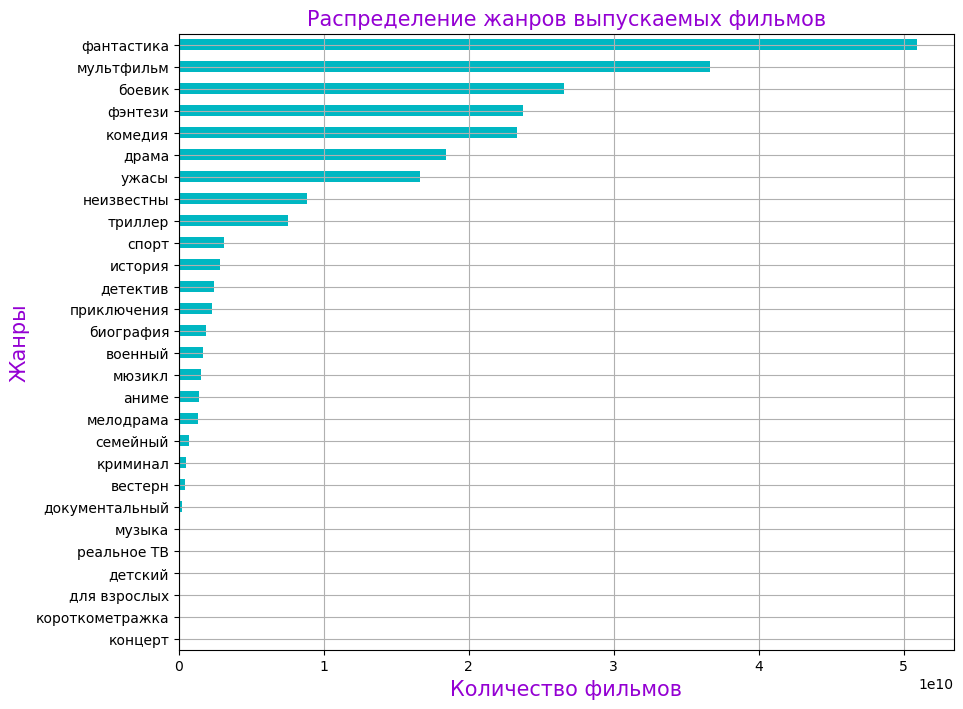

In [111]:
data.query('show_year > 2014').pivot_table(index='main_genre', values='box_office', aggfunc='sum') \
.sort_values(by='box_office', ascending=True).plot( 
          alpha=1, 
          kind='barh',
          color='#00B7C2',
          grid=True, 
          figsize=(10,8))
plt.title('Распределение жанров выпускаемых фильмов', fontsize=15, color='darkviolet')
plt.ylabel('Жанры', fontsize=15, color='darkviolet')
plt.xlabel('Количество фильмов', fontsize=15, color='darkviolet')
plt.legend().set_visible(False)
plt.show()

* Наибольшие кассовые сборы со значительным отрывом имеют фильмы жанра "Фантастика", а также мультфильмы. Драмы при этом находятся только на 6 месте.

Проанализируем средние продажи фильмов по жанрам. Построим для этого столбчатую диаграмму:

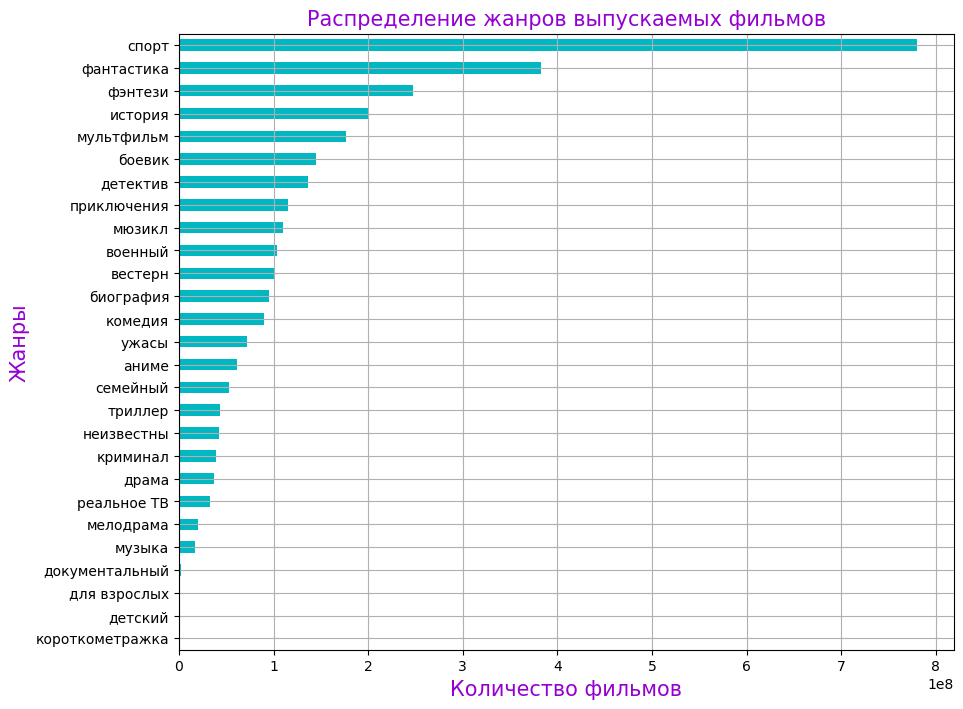

In [112]:
data.query('show_year > 2014').pivot_table(index='main_genre', values='box_office') \
.sort_values(by='box_office', ascending=True).plot( 
          alpha=1, 
          kind='barh',
          color='#00B7C2',
          grid=True, 
          figsize=(10,8))
plt.title('Распределение жанров выпускаемых фильмов', fontsize=15, color='darkviolet')
plt.ylabel('Жанры', fontsize=15, color='darkviolet')
plt.xlabel('Количество фильмов', fontsize=15, color='darkviolet')
plt.legend().set_visible(False)
plt.show()

* В среднем самые высокие кассовые сборы у фильмов жанра "спорт", но "фантастика" при этом находится на втором месте. 

### Исследование стран производства

Составим сводную таблицу, сгруппированную по столбцу `country_type`, в которой с помощью столбца `box_office` исследуем интерес зрителей к фильмам отечественного и зарубежного производства.

In [113]:
data.pivot_table(index='country_type', values='box_office', columns='show_year', aggfunc='sum') \
.style.background_gradient('Blues').format('{:,.0f}')

show_year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country_type,,,,,,,,,,
иностранный,"2,154,715","13,649,685","5,859,410","6,575,160","5,614,410,580","31,920,149,695","40,399,889,820","37,121,944,391","36,148,936,631","37,070,456,625"
отечественный,"236,224","389,475","1,036,783","23,198,232","1,695,652,197","6,020,970,816","7,385,903,473","11,333,222,524","13,476,703,832","10,603,269,563"
совместный,"21,740","50,200",0,"4,400","124,626,141","576,823,400","61,569,835","108,502,342","41,134,224","747,348,128"


Отметим, что фильмы иностранного производства лидируют по кассовым сбором во все рассматриваемые годы, кроме 2013.

In [114]:
data.query('country_type == "отечественный" and show_year == 2013') \
.sort_values(by='box_office', ascending=False).head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,is_gov_support,show_year,main_genre,main_director,share_support,country_type,is_box_office
1496,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,5.30,"комедия,фантастика",19957031.50,1,2013,комедия,Р.Давлетьяров,0.61,отечественный,1
1740,Иван Царевич и Серый Волк 2,111014613,2013-12-20,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,В.Торопчин,"А.Боярский, С.Сельянов",«0+» - для любой зрительской аудитории,NaN,...,5.30,"мультфильм,приключения,семейный",1081797.00,0,2013,мультфильм,В.Торопчин,NaN,отечественный,1
790,Что творят мужчины,111000513,2013-02-15,Художественный,"ООО ""Комедия Фильм""",Россия,С.Андреасян,"Г.Малков, С.Андреасян, Г.Андреасян, В.Поляков",«18+» - запрещено для детей,NaN,...,3.30,комедия,779027.60,0,2013,комедия,С.Андреасян,NaN,отечественный,1
1280,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,8.10,"драма,мелодрама",365353.60,1,2013,драма,А.Атанесян,0.33,отечественный,1
1397,Ёлки 3,111009713,2013-12-06,Художественный,"ООО ""ТаББаК""",Россия,"Д.Киселев, Е.Телегина, А.Котт, А.Карпиловский,...","Т.Бекмамбетов, И.Стромилова",«6+» - для детей старше 6 лет,NaN,...,6.90,комедия,115850.00,0,2013,комедия,Д.Киселев,NaN,отечественный,1


Построим график, отражающий динамику изменения количества фильмов разного производства:

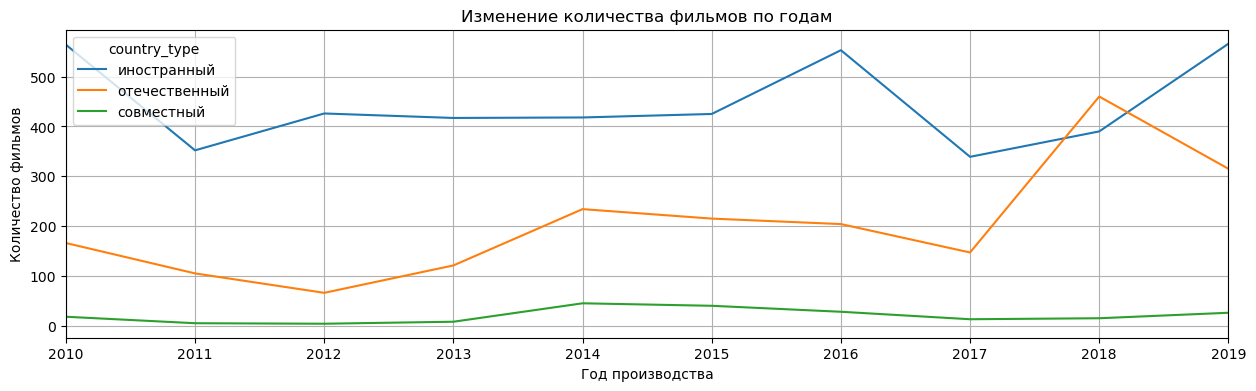

In [115]:
data.pivot_table(index='show_year', values='title', columns='country_type', aggfunc='count') \
.plot(title='Изменение количества фильмов по годам', 
          alpha=1, 
          figsize=(15,4),
          grid=True)
plt.xlim(2010,2019)
plt.xlabel('Год производства')
plt.ylabel('Количество фильмов')
plt.show()

📌 Выводы по построенному графику:
* По сравнению с 2010 годом наблюдается спад в прокате иностранных фильмов;
* В период с 2016 по 2017 год количество фильмов иностранного производства в прокате значительно снизилось. 

Построим график, отражающий динамику роста популярности в кинопрокате фильмов производства разных стран:

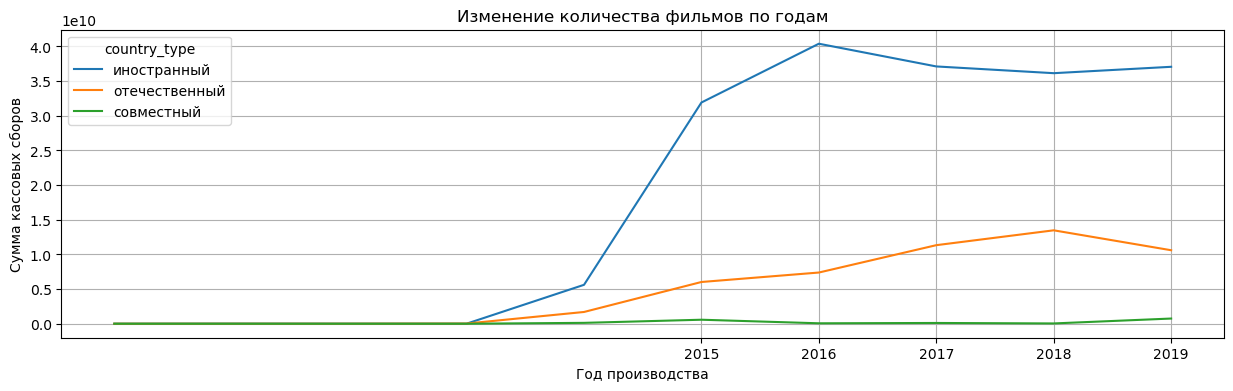

In [116]:
data.pivot_table(index='show_year', columns='country_type', values='box_office', aggfunc='sum') \
.plot(title='Изменение количества фильмов по годам', 
          alpha=1, 
          figsize=(15,4),
          grid=True)
plt.xticks(range(2015,2020,1))
plt.xlabel('Год производства')
plt.ylabel('Сумма кассовых сборов')
plt.show()

📌 Вывод по построенному графику:
* C 2016 года наблюдается незначительный спад в сумме кассовых сборов иностранных фильмов и при этом незначительный рост кассовых сборов отечественных фильмов;
* C 2018 года картина меняется в обратную сторону: кассовые сборы иностранных фильмов потихонечку растут, а отечественных - падают.

## Исследование фильмы с государственной поддержкой

### Исследование интереса к фильмам с государственной поддержкой

Построим сводную таблицу, сгруппированную по столбцу `is_gov_support`, чтобы исследовать, какое количество отечественных фильмов в период с 2015 по 2019 год выпущено больше:

In [117]:
data.query('show_year > 2014 and country_type == "отечественный"') \
.pivot_table(index='is_gov_support', values='title', aggfunc='count') \
.sort_values(by='title', ascending=False).style.background_gradient('Blues')

,title
is_gov_support,
0,1047
1,294


* Количество фильмов без государственной поддержки почти в 5 раз больше, чем количество фильмов с государственной поддержкой.

Построим сводную таблицу, сгруппированную по столбцу `is_gov_support`, чтобы исследовать, какое количество отечественных фильмов в период с 2015 по 2019 год собрало больше кассовых сборов:

In [118]:
data.query('show_year > 2014 and country_type == "отечественный"').pivot_table(index='is_gov_support', \
                                                                               values='box_office', aggfunc='sum') \
.sort_values(by='box_office', ascending=False).style.background_gradient('Blues').format('{:,.0f}')

,box_office
is_gov_support,
1,"39,427,922,434"
0,"9,392,147,774"


* Количество фильмов, получивших государственную поддержку, кратно лидирует в сумме кассовых сборов. 

### Исследование источников государственного финансирования

Построим сводную таблицу, сгруппированную по столбцу `financing_source`, чтобы исследовать, какой источник государстввенного финансирования выделяет наибольшее количество средств на поддержку кинопроизводства:

In [119]:
data.query('is_gov_support == 1').pivot_table(index='financing_source', values='share_support') \
.sort_values(by='share_support', ascending=False).style.background_gradient('Blues')

,share_support
financing_source,
"Министерство культуры, Фонд кино",0.541288
Министерство культуры,0.532658
Фонд кино,0.506912


Доля средств, выделяемых министерством культуры и фондом кино совместно является наибольшей.

Исследуем, как менялась доля выделяемых средств каждым фондом с 2015 по 2019 год:

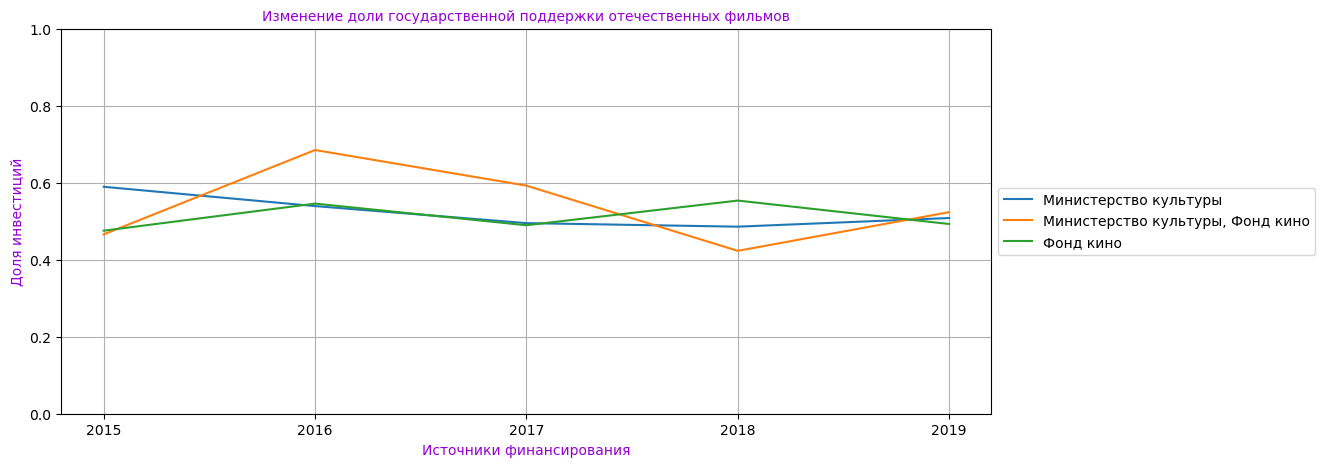

In [120]:
data.query('is_gov_support == 1 and show_year > 2014').pivot_table(index='show_year', columns='financing_source', \
                                                                   values='share_support') \
    .plot(alpha=1, grid=True, figsize=(12,5))
plt.title('Изменение доли государственной поддержки отечественных фильмов', fontsize=10, color='darkviolet')
plt.xlabel('Источники финансирования', fontsize=10, color='darkviolet')
plt.ylabel('Доля инвестиций', fontsize=10, color='darkviolet')
plt.xticks(range(2015,2020,1))
plt.ylim(0,1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

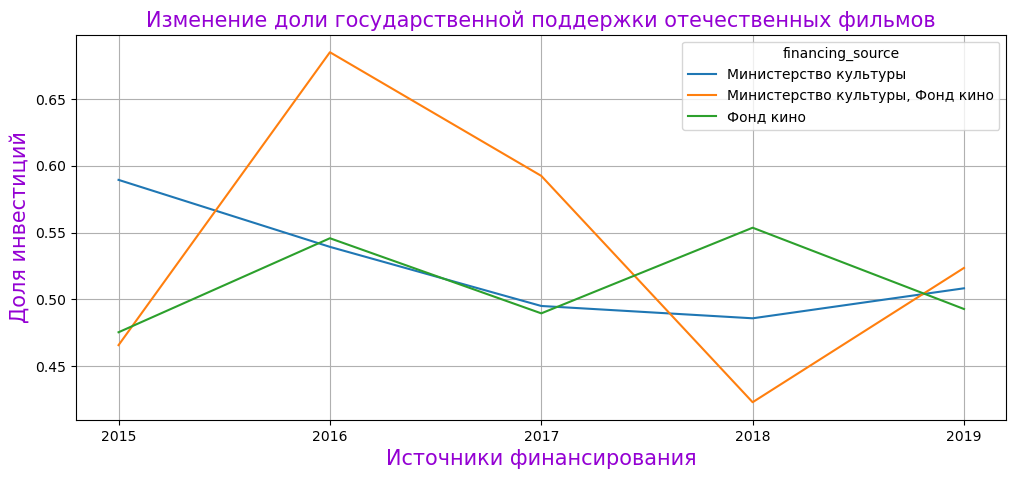

In [121]:
data.query('is_gov_support == 1 and show_year > 2014').pivot_table(index='show_year', columns='financing_source', \
                                                                   values='share_support') \
    .plot(alpha=1, grid=True, figsize=(12,5))
plt.title('Изменение доли государственной поддержки отечественных фильмов', fontsize=15, color='darkviolet')
plt.xlabel('Источники финансирования', fontsize=15, color='darkviolet')
plt.ylabel('Доля инвестиций', fontsize=15, color='darkviolet')
plt.xticks(range(2015,2020,1))
plt.show()

* С 2016 по 2018 год наблюдется снижение доли совместного государственного финансирования фильмов; 
* C 2018 года возвращается рост совместной гос. поддержки;

### Исследование жанровых предпочтений

Построим столбчатую диаграмму, используя сводную таблицу по столбцу `main_genre`, чтобы проанализировать, сколько фильмов с государственной поддержкой каждого жанра были выпущены в прокат в период с 2015 по 2019 годы:

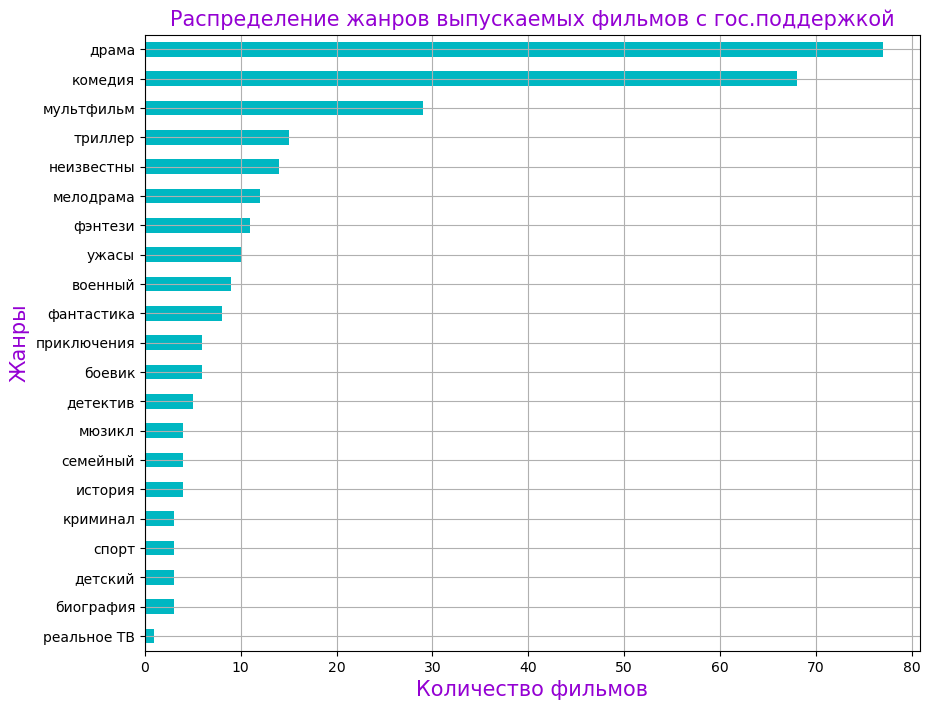

In [122]:
data.query('show_year > 2014 and is_gov_support == 1').pivot_table(index='main_genre', values='box_office', \
                                                                   aggfunc='count') \
    .sort_values(by='box_office', ascending=True) \
    .plot(alpha=1, kind='barh', color='#00B7C2', grid=True, figsize=(10,8))
plt.title('Распределение жанров выпускаемых фильмов c гос.поддержкой', fontsize=15, color='darkviolet')
plt.ylabel('Жанры', fontsize=15, color='darkviolet')
plt.xlabel('Количество фильмов', fontsize=15, color='darkviolet')
plt.legend().set_visible(False)
plt.show()

* Лидерами среди выпускаемых фильмов с государственной поддержкой также являются драмы и комедии.

Построим столбчатую диаграмму, используя сводную таблицу по столбцу `main_genre`, чтобы проанализировать, жанры каких фильмов с государственной поддержкой получили наибольшую долю инвестиций от государства:

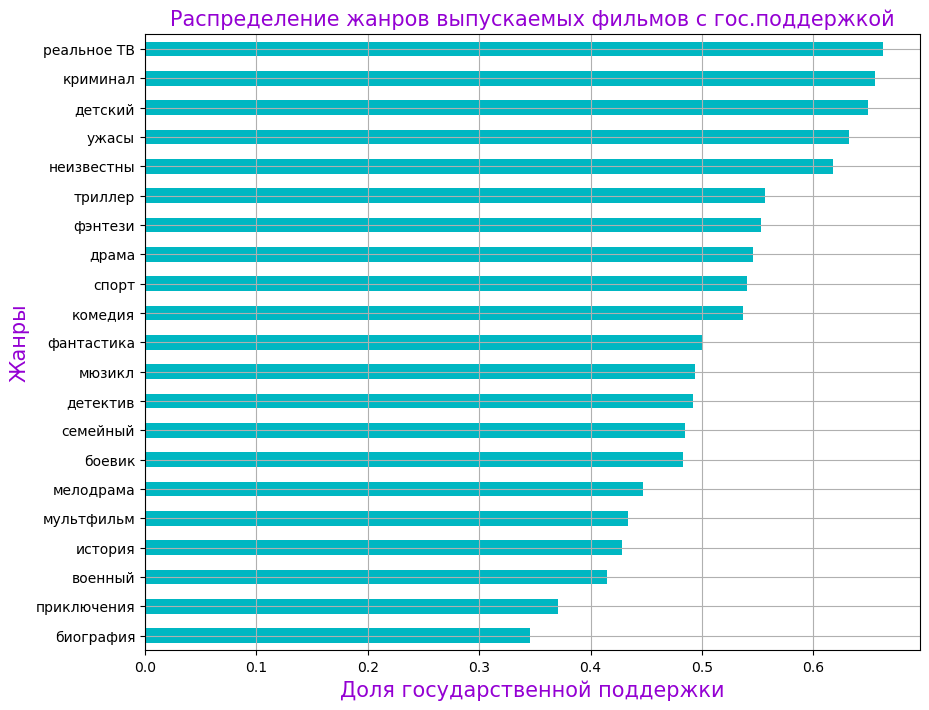

In [123]:
data.query('show_year > 2014 and is_gov_support == 1').pivot_table(index='main_genre', values='share_support') \
.sort_values(by='share_support', ascending=True).plot( 
          alpha=1, 
          kind='barh',
          color='#00B7C2',
          grid=True, 
          figsize=(10,8))
plt.title('Распределение жанров выпускаемых фильмов c гос.поддержкой', fontsize=15, color='darkviolet')
plt.ylabel('Жанры', fontsize=15, color='darkviolet')
plt.xlabel('Доля государственной поддержки', fontsize=15, color='darkviolet')
plt.legend().set_visible(False)
plt.show()

* Больше всего финансов государство вкладывает в ТВ, а таже криминал и детские фильмы. 

In [124]:
# check
data['share_check'] = (data['refundable_support'] + data['nonrefundable_support'])

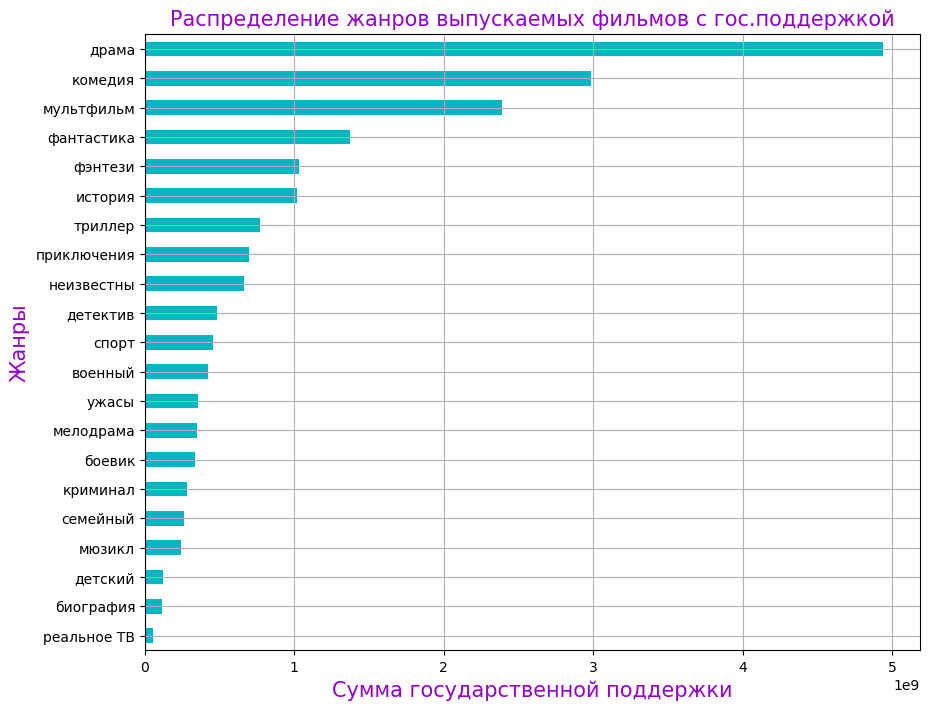

In [125]:
# check
data.query('show_year > 2014 and is_gov_support == 1').pivot_table(index='main_genre', values='share_check', aggfunc='sum') \
.sort_values(by='share_check', ascending=True).plot( 
          alpha=1, 
          kind='barh',
          color='#00B7C2',
          grid=True, 
          figsize=(10,8))
plt.title('Распределение жанров выпускаемых фильмов c гос.поддержкой', fontsize=15, color='darkviolet')
plt.ylabel('Жанры', fontsize=15, color='darkviolet')
plt.xlabel('Сумма государственной поддержки', fontsize=15, color='darkviolet')
plt.legend().set_visible(False)
plt.show()

Используя сводную таблицу по столбцу `main_genre`, построим столбчатую диаграмму и проанализируем, фильмы с государственной поддержкой какого жанра собирают наибольшую сумму кассовых сборов в период с 2015 по 2019 годы:

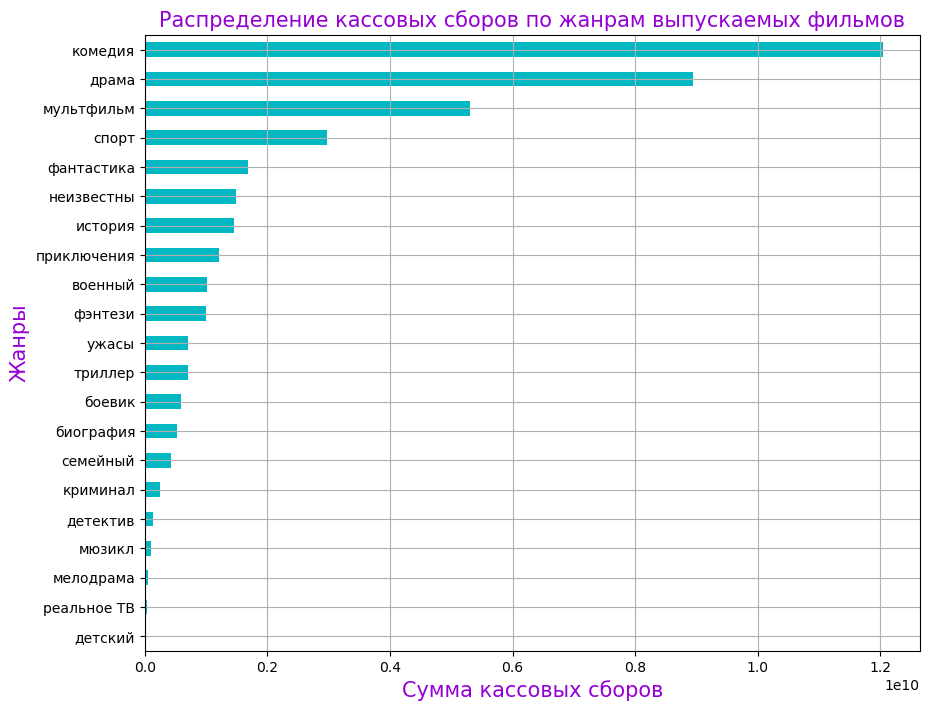

In [126]:
data.query('show_year > 2014 and is_gov_support == 1').pivot_table(index='main_genre', values='box_office', \
                                                                   aggfunc='sum') \
    .sort_values(by='box_office', ascending=True) \
    .plot(alpha=1, kind='barh', color='#00B7C2', grid=True, figsize=(10,8))
plt.title('Распределение кассовых сборов по жанрам выпускаемых фильмов', fontsize=15, color='darkviolet')
plt.ylabel('Жанры', fontsize=15, color='darkviolet')
plt.xlabel('Сумма кассовых сборов', fontsize=15, color='darkviolet')
plt.legend().set_visible(False)
plt.show()

* Лидерами среди кассовых сборов для фильмов с государственной поддержкой являются комедии и драмы. 

### Исследование топ-10 фильмов с государственной поддержкой

Построим сводную таблицу, сгруппированную по столбцу `title`, в которой отразим топ-10 фильмов в период с 2015-2019 год, получивших наибольшую долю государственной поддержки, их рейтинг, бюджет, а также сумму кассовых сборов:

In [127]:
data.query('is_gov_support == 1 and show_year > 2014') \
.pivot_table(index=['title', 'main_director', 'show_year', 'main_genre'], \
             values=['share_support', 'budget', 'box_office', 'ratings']) \
.sort_values(by='share_support', ascending=False).head(10).style.background_gradient('Blues').format('{:,.2f}')

,,,,box_office,budget,ratings,share_support
title,main_director,show_year,main_genre,,,,
Мифы,А.Молочников,2017,комедия,"50,451,949.00","50,000,000.00",4.80,0.90
О любви (2017),В.Бортко,2016,неизвестны,"11,332,412.00","70,086,439.00",0.00,0.78
Наследники (2015),В.Хотиненко,2015,мюзикл,"194,780.00","50,218,741.00",6.10,0.70
Экспириенс,Е.Татаров,2015,драма,"36,550.00","37,142,857.00",4.70,0.70
Преображение (2015),Т.Воронецкая,2016,ужасы,"56,800.00","37,142,857.00",5.70,0.70
Чудо-юдо,А.Лукичев,2017,мультфильм,"55,108,014.76","57,142,857.14",5.20,0.70
Память осени,А.Соколов,2016,драма,"58,500.00","70,000,000.00",5.70,0.70
Любовь с ограничениями,Д.Тюрин,2016,комедия,"70,299,052.00","100,000,000.00",6.30,0.70
Большое путешествие,Н.Лопато,2019,мультфильм,"147,606,826.51","257,142,857.14",6.20,0.70


* Рейтинг фильмов, получивших наибольшую долю средств государственной поддержки, не выше 6.3;
* Прокат только 1 фильма из представленных 10 окупил его производство;
* Фильм, окупивший производство, комедийного жанра, выпущен в 2017 году. Государство вложило в него 90% бюджета. 

Построим сводную таблицу, сгруппированную по столбцу `title`, в которой отразим топ-10 фильмов в период с 2015-2019 год, получивших наибольшую сумму кассовых сборов, отразив также для них другую основную информацию:

In [128]:
data.query('is_gov_support == 1 and show_year > 2014') \
.pivot_table(index=['title', 'main_director', 'show_year', 'main_genre'], \
             values=['share_support', 'budget', 'box_office', 'ratings']) \
.sort_values(by='box_office', ascending=False).head(10).style.background_gradient('Blues').format('{:,.2f}')

,,,,box_office,budget,ratings,share_support
title,main_director,show_year,main_genre,,,,
Холоп,К.Шипенко,2019,комедия,"3,073,568,690.79","160,000,000.00",6.80,0.38
Движение вверх,А.Мегердичев,2017,спорт,"2,779,686,144.00","590,192,191.00",7.50,0.68
Т-34,А.Сидоров,2018,драма,"2,271,754,004.52","563,784,717.00",6.50,0.32
Последний богатырь,Д.Дьяченко,2017,комедия,"1,655,037,688.00","352,477,575.00",6.80,0.28
Лёд,О.Трофим,2018,неизвестны,"1,445,731,797.89","148,585,222.00",0.00,0.57
Экипаж,Н.Лебедев,2016,драма,"1,402,255,390.00","635,283,867.00",7.60,0.70
Притяжение (2016),Ф.Бондарчук,2016,фантастика,"1,038,321,489.00","380,000,000.00",5.60,0.66
Ёлки Новые,Д.Киселев,2017,комедия,"855,451,052.00","174,381,922.00",5.80,0.57
Тренер,Д.Козловский,2018,драма,"820,528,005.21","390,191,139.00",6.80,0.67


* Рейтинг отечественных фильмов с наибольшей суммой кассовых сборов колеблется от 5.50 до 7.50;
* Прокат всех фильмов данного рейтинга окупил затраты на производство;
* Лидер по сумме кассовых сборов имеет 40% вложений государства. 

### Исследование топ-10 фильмов режиссеров

Построим сводную таблицу с именами топ-10 режиссеров, чьи фильмы собирают наибольшую сумму кассовых сборов. Отразим также средний рейтинг их фильмов, а также среднюю долю поддержки государства:

In [129]:
data.query('is_gov_support == 1 and show_year > 2014') \
.pivot_table(index='main_director', values=['box_office', 'ratings', 'share_support']) \
.sort_values(by='box_office', ascending=False).head(10).style.background_gradient('Blues').format('{:,.2f}')

,box_office,ratings,share_support
main_director,,,
А.Мегердичев,"2,779,686,144.00",7.50,0.68
А.Сидоров,"2,271,754,004.52",6.50,0.32
К.Шипенко,"1,913,124,233.89",7.10,0.42
О.Трофим,"1,445,731,797.89",0.00,0.57
Н.Лебедев,"1,402,255,390.00",7.60,0.70
Ф.Бондарчук,"1,038,321,489.00",5.60,0.66
Д.Козловский,"820,528,005.21",6.80,0.67
К.Феоктистов,"759,226,773.00",5.50,0.29
А.Кравчук,"717,703,185.53",6.00,0.51


* Лидер по кассовым сбором Антон Мерегдичев - режиссер фильмов "Движение вверх", "Метро", а также "Елки 3".
* Режиссер Алексей Сидоров, находящийся на второй месте как режиссер самых кассовых фильмов, получает о государства около 30% государственной поддержки. 

In [130]:
# check
pd.Series([0.5, 0.7, 0.3]).mean()

0.5

## Общий вывод

📌 **Цель данного исследования** - исследовать рынок российского кинопроката 2010-2019 годов и определить основные тренды периода.


Для проведения исследования использовались таблицы с информацией сайта Министерства культуры, а также сайта КиноПоиск.

1️⃣ Перед анализом данных в таблице была проведена **предобработка данных**: 
* выявлены и исследованы столбцы, имеющие **пропущенные значения**. В зависимости от выделенных причин и количества пропущенных значений некоторые пропущенные значения были удалены вместе со строками, некоторые были заменены, а некоторые оставлены без изменений; 
* **изменен тип данных** для столбцов `show_start_date`, `puNumber`, `ratings`, а также настроен тип изображения вещественных значений;
* выявлены и обработаны явные и неявные **дубликаты**;
* выявлены и обработаны недочеты в **категориальных и количественных данных**;
* для дальнейшего исследования **добавлены столбцы** `show_year`, `main_genre`, `share_support`, `country_type`.

2️⃣ В ходе **общего исследовательского анализа** с применением средств визуализации данных были обнаружены следующие тренды:
* Наиболее полно в таблице представлен период с 2015 по 2019 год. Поэтому дальнейший анализ был чаще сфокусирован на этом периоде;
* Самым удачным по сумме кассовых сборов является 2018 год;
* C 2014 года отмечается рост кассовых сборов, что сигнализирует о популяризации кинопроизводства;
* По средней сумме касовых сборов самым удачным является 2017 год. Отмечена большая разница в сумме средних и медианных сборов - это означает, что каждый год есть фильмы "локомотивы", которые значительно отличаются по сумме кассовых сборов временного периода;
* Лучше всего по кассовым сборам выстреливают фильмы категории "16+", а наименее популярная - "0+". В среднем больше всего выручки приносят фильмы категории "12+" и "6+". Отмечается рост интереса среди зрителей для фильмов категории "12+" и "18+";
* Самый выпускаемый жанр кино - драма, притом самый прибыльный - фантастика и мультфильмы. В среднем больше всего прибыли приносят фильмы жанра "спорт";
* Фильмы иностранного производства более интересны зрителю, нежели отечественные. С 2016 по 2018 год отмечено уменьшение кассовых сборов иностранных фильмов и увеличение отечественных, но к сожалению, с 2018 года ситуация изменилась в обратную сторону. 

3️⃣ Дальнейшее исследование сконцентрировалось на фильмах, **получивших государственную поддержку**. В ходе исследования с применением средств визуализации данных были обнаружены следующие тренды:
* Более успешны в прокате фильмы, получившие государственную поддержку, при том, что количество таких фильмов в ≈5 раз меньше, чем тех, кто выпускается без источников государственного финансирования;
* Наибольшая доля средств выделяется фондом Кино и министерством культуры совместно. С 2016 по 2018 год доля финансирования фильмов падала, но с 2018 снова начала увеличиваться;
* Больше всего с гос.поддержкой снимается драм и комедий. При этом наибольшее количество средств выделяется на ТВ, криминал и другие жанры: комедии и драмы в этом рейтинге только на 8 и 10 местах соответственно. 
* В прокате наибольшим успехом пользуются также комедии и мелодрамы с перевесом в сторону комедий;
* Cреди топ-10 фильмов с наибольшей долей государственной поддержи только один окупился в прокате. Рейтинг этих фильмов не превышает 6.3;
* Cреди топ-10 фильмов по сумме кассовых сборов окупились все фильмы. Они преимущественно сняты в жанрах драмы и комедии. Рейтинг этих фильмов выше и колеблется от 5.5 до 7.5;
* Лучшими режиссерами по количеству кассовых сборов можно считать Антона Мегердичева и Алексея Сидорова. 